<!-- Table of Contents -->

## Contents
- Hourly consumption (last complete local day, 24 hours)
- Daily consumption (last 7 days)
- Hourly temperature (last complete local day, 24 hours)
- Daily temperature (last 7 days preview)
- Regression analysis (daily consumption ~ daily avg temperature)
- Bias correction factors (monthly/seasonal)
- Temperature forecast (next 7 days)
- Daily consumption forecast (next 7 days)
- Weekday load profiles (24×7 share matrix)
- **Hourly consumption forecast (next 7 days)** — ℹ️ **Tip:** If you only need the hourly forecast, run **this script only**; the earlier steps are not required.

## How to use — Hourly consumption (last complete local day, 24 hours)

**What this cell does**
- Imports hourly consumption via `elering_consumption.get_hourly_consumption(...)` in **Europe/Tallinn**.
- Finds the **last local calendar day that has exactly 24 hourly records** (skips DST 23/25-hour days).
- Shows a **24-row table**, draws a **line chart**, prints **data types (.dtypes) and .info()**.
- Optionally saves a CSV of that day to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `elering_consumption.py` (or adjust `SCRIPTS_DIR` in the cell).
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default to avoid partial days (you can change it).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s (possibly partial) data.
- `SAVE_CSV`: `True` to write the day slice to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A **24-row** table for the last complete local day,
  - A **line chart** of hourly values,
  - Printed **shape**, **time range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_hourly_last_complete_day_YYYYMMDD.csv` — the 24-hour slice for that local date.

**Customize**
- No complete 24-hour day found? (e.g., due to DST 23/25-hour days)  
  – Increase `MONTHS`, or switch to a **calendar-day slice** (00:00–23:00 even if 23/25 rows),  
  – or use the **rolling 24h** preview cell if you specifically want “last 24 hours” regardless of date boundaries.

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is in the same directory or adjust `sys.path`.
- *Empty preview:* widen the history window (`MONTHS`) or verify the data range printed by the cell.


Last complete local day: 2025-09-22 (rows: 24)


,sum_cons_time,sum_el_hourly_value,imputed,weekday,is_weekend,is_holiday
0,2025-09-22 00:00:00+03:00,717.1,False,Monday,False,False
1,2025-09-22 01:00:00+03:00,679.0,False,Monday,False,False
2,2025-09-22 02:00:00+03:00,652.3,False,Monday,False,False
3,2025-09-22 03:00:00+03:00,653.0,False,Monday,False,False
4,2025-09-22 04:00:00+03:00,664.1,False,Monday,False,False
5,2025-09-22 05:00:00+03:00,696.1,False,Monday,False,False
6,2025-09-22 06:00:00+03:00,788.7,False,Monday,False,False
7,2025-09-22 07:00:00+03:00,973.7,False,Monday,False,False
8,2025-09-22 08:00:00+03:00,1057.0,False,Monday,False,False
9,2025-09-22 09:00:00+03:00,1055.4,False,Monday,False,False


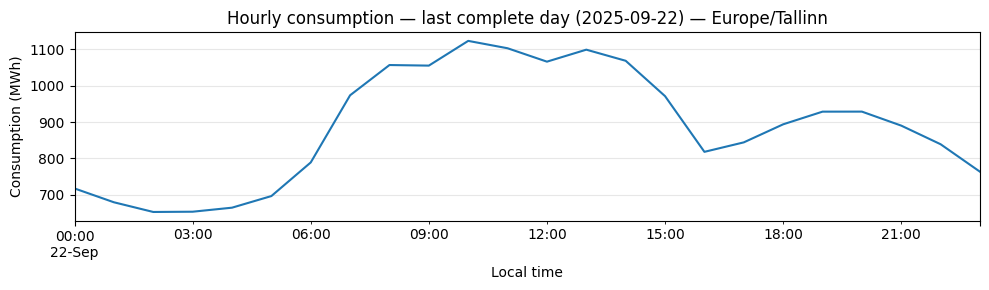

=== HOURLY (FULL DAY): dtypes ===
sum_cons_time          datetime64[ns, Europe/Tallinn]
sum_el_hourly_value                           float64
imputed                                          bool
weekday                                        object
is_weekend                                       bool
is_holiday                                       bool
dtype: object

=== HOURLY (FULL DATASET): dtypes ===
sum_cons_time          datetime64[ns, Europe/Tallinn]
sum_el_hourly_value                           float64
imputed                                          bool
weekday                                        object
is_weekend                                       bool
is_holiday                                       bool
dtype: object

=== HOURLY (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17543 entries, 0 to 17542
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype                         
---  ------               ----

In [1]:
# --- Hourly consumption: last COMPLETE 24-hour local day (Europe/Tallinn) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from elering_consumption import get_hourly_consumption
except Exception as e:
    raise ImportError(f"Could not import elering_consumption.py from {SCRIPTS_DIR}: {e}")

# 1) Load hourly data (tz-aware; Europe/Tallinn)
df_hourly = get_hourly_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing=True,
)

if df_hourly.empty:
    raise RuntimeError("No hourly data loaded. Increase MONTHS or check the source period printed earlier.")

# 2) Find last COMPLETE 24-hour local day (skip 23/25h DST days)
idxed = df_hourly.set_index("sum_cons_time").sort_index()

work = idxed.copy()
# add local calendar date as a column to avoid future groupby warnings
work["date_local"] = work.index.tz_convert(TZ).date
counts = work.groupby("date_local").size()     # number of hours per local date
full_dates = counts[counts == 24]

if full_dates.empty:
    raise RuntimeError(
        "No complete 24-hour local day found in the current window. "
        "Increase MONTHS or switch to a calendar-day slice (00:00–23:00, may have 23/25 rows on DST days)."
    )

last_full_date = full_dates.index.max()  # datetime.date
day_start = pd.Timestamp(last_full_date, tz=TZ)
day_end   = day_start + pd.Timedelta(days=1)

day_slice = idxed.loc[day_start:day_end - pd.Timedelta(seconds=1)].reset_index()

# 3) Preview table (24 rows)
print(f"Last complete local day: {last_full_date} (rows: {len(day_slice)})")
display(day_slice)

# 4) Plot line chart for that day
ax = (day_slice.set_index("sum_cons_time")["sum_el_hourly_value"]
                 .plot(figsize=(10, 3),
                       title=f"Hourly consumption — last complete day ({last_full_date}) — {TZ}"))
ax.set_xlabel("Local time")
ax.set_ylabel("Consumption (MWh)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Data types & quick info
print("=== HOURLY (FULL DAY): dtypes ===")
print(day_slice.dtypes)
print("\n=== HOURLY (FULL DATASET): dtypes ===")
print(df_hourly.dtypes)
print("\n=== HOURLY (FULL DATASET): .info() ===")
df_hourly.info()

# 6) Optionally save the 24-hour slice (and full dataset, if needed)
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    out_day = OUTDIR / f"elering_hourly_last_complete_day_{last_full_date:%Y%m%d}.csv"
    day_slice.to_csv(out_day, index=False)
    print(f"\n[saved] {out_day}")
    # Uncomment if you also want to save the full hourly dataset:
    # df_hourly.to_csv(OUTDIR / "elering_hourly_all.csv", index=False)


## How to use — Daily consumption (last 7 days)

**What this cell does**
- Imports **daily** consumption via `elering_consumption.get_daily_consumption(...)` on the **Europe/Tallinn** calendar.
- Shows a **7-day preview**, draws a **bar chart**, prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Notebook in the **same folder** as `elering_consumption.py`.
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default (avoids partial days).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A small table with the **last 7 days** (inclusive slice: *end − 6 days … end → 7 rows*),
  - A **bar chart** of daily totals,
  - Printed **shape**, **date range**, **data types (`.dtypes`)**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_daily_all.csv` — full daily dataset (EE calendar).
- `output/elering_daily_last7d_preview.csv` — only the last 7 days.

**Customize**
- Different preview window? Adjust the **start offset** used for the inclusive slice.  
  For exactly **N** days use `start = end - pd.Timedelta(days=N-1)` (this notebook uses `6` to get 7 rows).
- Include today? Set `EXCLUDE_TODAY=False`.
- Different chart type? Replace `kind="bar"` with `'line'` if you prefer a line chart.

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is reachable.
- *Empty preview:* verify the printed date range covers the last 7 days; adjust `MONTHS` or filters if needed.


Daily preview window: 2025-09-16 … 2025-09-22 (rows: 7)


,sum_cons_date,sum_el_daily_value,weekday,is_weekend,is_holiday
0,2025-09-16,20840.2,Tuesday,False,False
1,2025-09-17,19662.1,Wednesday,False,False
2,2025-09-18,20404.1,Thursday,False,False
3,2025-09-19,19503.6,Friday,False,False
4,2025-09-20,20107.5,Saturday,True,False
5,2025-09-21,18524.8,Sunday,True,False
6,2025-09-22,21273.6,Monday,False,False


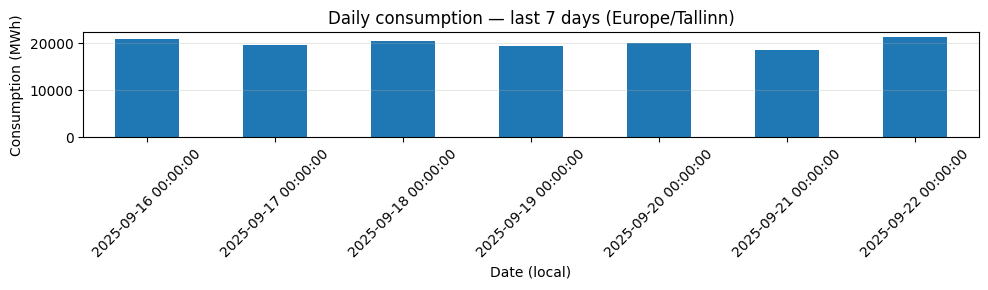

=== DAILY: shape === (731, 5)
=== DAILY: date range === 2023-09-23 00:00:00 → 2025-09-22 00:00:00

=== DAILY: dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
weekday                       object
is_weekend                      bool
is_holiday                      bool
dtype: object

=== DAILY: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   weekday             731 non-null    object        
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ KB

[saved] output\elering_daily_all.csv
[saved] output\elering_daily_last7d_previ

In [2]:
# --- Daily consumption: preview last 7 days + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

from elering_consumption import get_daily_consumption

# 1) Load daily data (Europe/Tallinn calendar)
df_daily = get_daily_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing_hourly=True,
).copy()

# Guard: empty dataset
if df_daily.empty:
    raise RuntimeError("No daily data available. Increase MONTHS or verify the source period.")

# 2) Make sure the date column is datetime for safe slicing
df_daily["sum_cons_date"] = pd.to_datetime(df_daily["sum_cons_date"], errors="coerce")
df_daily = df_daily.sort_values("sum_cons_date").reset_index(drop=True)

# 3) Build an EXACT 7-day window (inclusive): end_d - 6 days .. end_d  -> 7 rows total
idxed_d = df_daily.set_index("sum_cons_date").sort_index()
end_d = idxed_d.index.max()
if pd.isna(end_d):
    raise RuntimeError("No valid dates found in daily data.")

start_d = end_d - pd.Timedelta(days=6)  # use 6 to get exactly 7 rows inclusive
last_7d = idxed_d.loc[start_d:end_d].reset_index()

# Guard: preview may be shorter if history is limited
if last_7d.empty:
    raise RuntimeError("Empty 7-day preview. Check the printed date range or widen MONTHS.")

# 4) Preview table
print(f"Daily preview window: {start_d.date()} … {end_d.date()} (rows: {len(last_7d)})")
display(last_7d)

# 5) Plot: last 7 days (bar)
ax = (last_7d.set_index("sum_cons_date")["sum_el_daily_value"]
               .plot(kind="bar",
                     figsize=(10, 3),
                     title="Daily consumption — last 7 days (Europe/Tallinn)",
                     rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("Consumption (MWh)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 6) Data types & quick info
print("=== DAILY: shape ===", df_daily.shape)
print("=== DAILY: date range ===", df_daily["sum_cons_date"].min(), "→", df_daily["sum_cons_date"].max())
print("\n=== DAILY: dtypes ===")
print(df_daily.dtypes)
print("\n=== DAILY: .info() ===")
df_daily.info()

# 7) Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    all_path = OUTDIR / "elering_daily_all.csv"
    prev_path = OUTDIR / "elering_daily_last7d_preview.csv"
    df_daily.to_csv(all_path, index=False)
    last_7d.to_csv(prev_path, index=False)
    print(f"\n[saved] {all_path}")
    print(f"[saved] {prev_path}")


## How to use — Hourly temperature (last complete local day, 24 hours)

**What this cell does**
- Imports **hourly temperature** via `meteostat_temperature.get_hourly_temperature(...)` on **Europe/Tallinn** time.
- Finds the **last local calendar day that has exactly 24 hourly records** (skips DST 23/25-hour days).
- Shows a **24-row table**, draws a **line chart**, prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves a CSV of that day to `./output/`.

**Before you run**
- This notebook should be in the **same folder** as `meteostat_temperature.py` (or adjust `SCRIPTS_DIR`).
- Python packages: `pandas`, `matplotlib`, `meteostat`.

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s partial data.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A **24-row** table for the **last complete local day** (`hour_temp_time`, `hour_temp_value` in °C),
  - A **line chart** of that day,
  - Printed **shape**, **time range**, **data types (`.dtypes`)**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_hourly_temp_last_complete_day_YYYYMMDD.csv` — the 24-hour slice for that local date.

**Customize**
- No complete 24-hour day found? Increase `MONTHS`, or switch to a **calendar-day slice** (00:00–23:00; note that DST days can have **23** or **25** rows), or use a **rolling 24h** preview.
- Include today? Set `EXCLUDE_TODAY=False` (not recommended if today is partial).

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* widen `MONTHS` or verify the printed time range covers the desired period.


Hourly temperature window: 2025-09-22 00:00:00+03:00 … 2025-09-22 23:59:59+03:00 (rows: 24)


,hour_temp_time,hour_temp_value
0,2025-09-22 00:00:00+03:00,19.3
1,2025-09-22 01:00:00+03:00,18.72
2,2025-09-22 02:00:00+03:00,18.46
3,2025-09-22 03:00:00+03:00,17.78
4,2025-09-22 04:00:00+03:00,17.42
5,2025-09-22 05:00:00+03:00,16.92
6,2025-09-22 06:00:00+03:00,16.3
7,2025-09-22 07:00:00+03:00,15.74
8,2025-09-22 08:00:00+03:00,15.1
9,2025-09-22 09:00:00+03:00,15.06


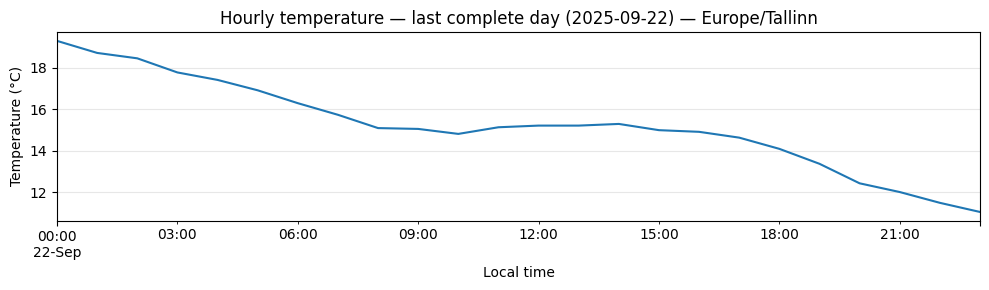

=== HOURLY TEMP (FULL DAY): dtypes ===
hour_temp_time     datetime64[ns, Europe/Tallinn]
hour_temp_value                           Float64
dtype: object

=== HOURLY TEMP (FULL DATASET): dtypes ===
hour_temp_time     datetime64[ns, Europe/Tallinn]
hour_temp_value                           Float64
dtype: object

=== HOURLY TEMP (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545 entries, 0 to 17544
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype                         
---  ------           --------------  -----                         
 0   hour_temp_time   17545 non-null  datetime64[ns, Europe/Tallinn]
 1   hour_temp_value  17545 non-null  Float64                       
dtypes: Float64(1), datetime64[ns, Europe/Tallinn](1)
memory usage: 291.4 KB

[saved] output\meteostat_hourly_temp_last_complete_day_20250922.csv


In [3]:
# --- Hourly temperature: last COMPLETE 24-hour local day (Europe/Tallinn) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_hourly_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

# 1) Load hourly temperature (tz-aware; Europe/Tallinn)
df_hourly_t = get_hourly_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
).copy()

if df_hourly_t.empty:
    raise RuntimeError("No hourly temperature data loaded. Increase MONTHS or verify the source period.")

# 2) Find last COMPLETE 24-hour local day (skip 23/25h DST days)
idxed = df_hourly_t.set_index("hour_temp_time").sort_index()

work = idxed.copy()
# add local calendar date as a column to avoid future groupby warnings
work["date_local"] = work.index.tz_convert(TZ).date
counts = work.groupby("date_local").size()      # number of hours per local date
full_dates = counts[counts == 24]

if full_dates.empty:
    raise RuntimeError(
        "No complete 24-hour local day found in the current window. "
        "Increase MONTHS or use a calendar-day slice (00:00–23:00; DST days can have 23/25 rows)."
    )

last_full_date = full_dates.index.max()  # datetime.date
if pd.isna(pd.Timestamp(last_full_date)):
    raise RuntimeError("Could not determine the last complete local day (invalid date).")

day_start = pd.Timestamp(last_full_date, tz=TZ)
day_end   = day_start + pd.Timedelta(days=1)

day_slice = idxed.loc[day_start:day_end - pd.Timedelta(seconds=1)].reset_index()

# 3) Preview table (24 rows)
print(f"Hourly temperature window: {day_start} … {day_end - pd.Timedelta(seconds=1)} (rows: {len(day_slice)})")
display(day_slice)

# 4) Plot line chart for that day
ax = (day_slice.set_index("hour_temp_time")["hour_temp_value"]
                 .plot(figsize=(10, 3),
                       title=f"Hourly temperature — last complete day ({last_full_date}) — {TZ}"))
ax.set_xlabel("Local time")
ax.set_ylabel("Temperature (°C)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Data types & quick info
print("=== HOURLY TEMP (FULL DAY): dtypes ===")
print(day_slice.dtypes)
print("\n=== HOURLY TEMP (FULL DATASET): dtypes ===")
print(df_hourly_t.dtypes)
print("\n=== HOURLY TEMP (FULL DATASET): .info() ===")
df_hourly_t.info()

# 6) Optionally save the 24-hour slice (and full dataset, if needed)
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    out_day = OUTDIR / f"meteostat_hourly_temp_last_complete_day_{last_full_date:%Y%m%d}.csv"
    day_slice.to_csv(out_day, index=False)
    print(f"\n[saved] {out_day}")
    # Uncomment to also save the full hourly dataset:
    # df_hourly_t.to_csv(OUTDIR / "meteostat_hourly_temp_all.csv", index=False)


## How to use — Daily temperature (last 7 days preview)

**What this cell does**
- Imports **daily average temperature** via `meteostat_temperature.get_daily_temperature(...)` on the **Europe/Tallinn** calendar.
- Shows an **exact 7-day preview**, draws a **line (or bar) chart**, and prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Place the notebook in the **same folder** as `meteostat_temperature.py`.
- Python packages: `pandas`, `matplotlib`, `meteostat`.
- Today is **excluded** by default (avoids partial days).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A table with the **last 7 days** (`avg_day_temp_date`, `hour_day_value` in °C; inclusive slice: *end − 6 days … end → 7 rows*).
  - A **chart** of daily averages (default: line).
  - Printed **shape**, **date range**, **data types (`.dtypes`)**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_daily_temp_all.csv` — full daily temperature dataset (EE calendar).
- `output/meteostat_daily_temp_last7d_preview.csv` — only the last 7 days.

**Customize**
- Exact window logic uses an **inclusive** slice `start..end`.  
  For **N** days, set `start = end - pd.Timedelta(days=N-1)` (this notebook uses `N=7` → `end - 6 days`).
- Prefer a bar chart? Use `.plot(kind='bar', ...)` instead of `kind='line'`.
- Include today? Set `EXCLUDE_TODAY=False` (may include a partial day).

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* increase `MONTHS` or verify the printed date range covers the last 7 days.


Daily temperature preview window: 2025-09-16 … 2025-09-22 (rows: 7, target: 7)


,avg_day_temp_date,hour_day_value
0,2025-09-16,14.975
1,2025-09-17,14.930833
2,2025-09-18,13.685
3,2025-09-19,14.418333
4,2025-09-20,15.365
5,2025-09-21,17.910833
6,2025-09-22,15.231667


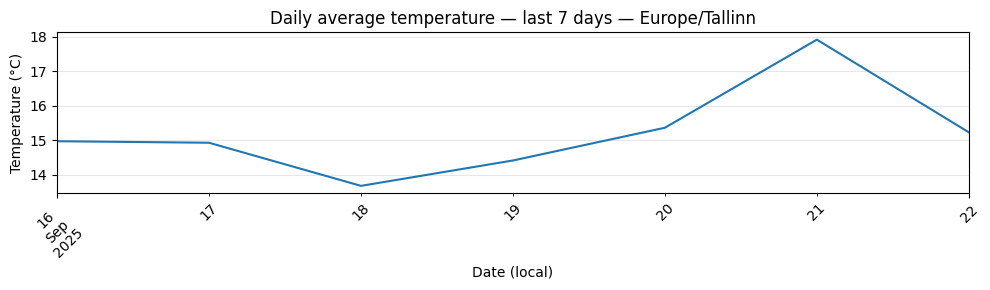

=== DAILY TEMP (FULL DATASET): shape === (731, 2)
=== DAILY TEMP (FULL DATASET): date range === 2023-09-23 00:00:00 → 2025-09-22 00:00:00

=== DAILY TEMP (FULL DATASET): dtypes ===
avg_day_temp_date    datetime64[ns]
hour_day_value              Float64
dtype: object

=== DAILY TEMP (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   avg_day_temp_date  731 non-null    datetime64[ns]
 1   hour_day_value     731 non-null    Float64       
dtypes: Float64(1), datetime64[ns](1)
memory usage: 12.3 KB

[saved] output\meteostat_daily_temp_all.csv
[saved] output\meteostat_daily_temp_last7d_preview.csv


In [4]:
# --- Daily temperature: exact last N days + line plot + dtypes + optional CSV ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
N_DAYS = 7                 # exact number of days to show (inclusive window)
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_daily_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

if N_DAYS <= 0:
    raise ValueError("N_DAYS must be a positive integer (e.g., 7).")

# 1) Load daily temperature (Europe/Tallinn calendar)
df_daily_t = get_daily_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
).copy()

if df_daily_t.empty:
    raise RuntimeError("No daily temperature data available. Increase MONTHS or verify the source period.")

# 2) Ensure datetime for safe slicing & sort
df_daily_t["avg_day_temp_date"] = pd.to_datetime(df_daily_t["avg_day_temp_date"], errors="coerce")
df_daily_t = df_daily_t.sort_values("avg_day_temp_date").reset_index(drop=True)

# 3) Build an EXACT N-day window (inclusive slice): start = end - (N_DAYS-1)
idxed_d = df_daily_t.set_index("avg_day_temp_date").sort_index()
end_d = idxed_d.index.max()
if pd.isna(end_d):
    raise RuntimeError("No valid dates found in daily temperature data.")
start_d = end_d - pd.Timedelta(days=N_DAYS - 1)
last_nd = idxed_d.loc[start_d:end_d].reset_index()

# Guard: preview may be shorter if history is limited
print(f"Daily temperature preview window: {start_d.date()} … {end_d.date()} (rows: {len(last_nd)}, target: {N_DAYS})")
if last_nd.empty:
    raise RuntimeError("Empty preview window. Widen MONTHS or check the available date range.")

# 4) Preview table
display(last_nd)

# 5) Plot: last N days (line). For bars: use kind="bar".
ax = (last_nd.set_index("avg_day_temp_date")["hour_day_value"]
               .plot(kind="line",
                     figsize=(10, 3),
                     title=f"Daily average temperature — last {N_DAYS} days — {TZ}",
                     rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("Temperature (°C)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 6) Data types & quick info
print("=== DAILY TEMP (FULL DATASET): shape ===", df_daily_t.shape)
print("=== DAILY TEMP (FULL DATASET): date range ===",
      df_daily_t["avg_day_temp_date"].min(), "→", df_daily_t["avg_day_temp_date"].max())
print("\n=== DAILY TEMP (FULL DATASET): dtypes ===")
print(df_daily_t.dtypes)
print("\n=== DAILY TEMP (FULL DATASET): .info() ===")
df_daily_t.info()

# 7) Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    all_path = OUTDIR / "meteostat_daily_temp_all.csv"
    prev_path = OUTDIR / f"meteostat_daily_temp_last{N_DAYS}d_preview.csv"
    df_daily_t.to_csv(all_path, index=False)
    last_nd.to_csv(prev_path, index=False)
    print(f"\n[saved] {all_path}")
    print(f"[saved] {prev_path}")


## How to use — Regression (daily consumption ~ daily avg temperature)

**What this cell does**
- Loads the **merged daily dataset** via `regression_analysis.load_daily_frames(...)` (Europe/Tallinn calendar).
- Fits a **linear regression** with `regression_analysis.run_linreg(x, y)`:
  - **ALL days**, and (if flags exist) **Workdays** vs **Weekends & Holidays**.
- Shows a **preview** of the **last 30 days** (exact, inclusive slice), plots a **scatter + fit line**, and prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves:
  - the **full merged daily dataset**,
  - a **30-day preview**,
  - a **metrics table** (CSV),
  - and **figure(s)** (PNG) to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `regression_analysis.py` (and the other scripts it imports).
- Required packages: `pandas`, `numpy`, `matplotlib`; optional `scipy` (adds p-value in metrics).
- Units: **consumption in MWh**, **temperature in °C**.
- Today is **excluded** by default to avoid partial days (configurable).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: must be `"Europe/Tallinn"` for consistency across the pipeline.
- `EXCLUDE_TODAY`: `True` to exclude today from the training frame.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.
- `SAVE_PNG`: `True` to save figure PNG(s) to `./output/`.

**Run**
- Execute the cell; you’ll see:
  - A **30-day preview** table of the merged frame (inclusive slice: *end − 29 days … end → 30 rows*),
  - A **scatter plot** with the regression line (ALL days),
  - Printed **metrics** for ALL days and (if available) segments,
  - **data types (`.dtypes`)** and **`.info()`**.

**Outputs (if `SAVE_CSV/PNG=True`)**
- `output/reg_daily_merged_all.csv` — full merged daily dataset.
- `output/reg_daily_merged_last30d_preview.csv` — preview window only.
- `output/regression_metrics.csv` — model metrics table (ALL / Workdays / Weekends & Holidays).
- `output/regression_all_days.png` — scatter + fit for ALL days.
- `output/regression_workdays.png`, `output/regression_offdays.png` — if segmented plots are created.

**Customize**
- Exact window uses an **inclusive** slice `start..end`.  
  For **N** days, set `start = end - pd.Timedelta(days=N-1)` (this notebook uses `N=30` → `end - 29 days`).
- Segmentation runs **only if** `is_weekend` and `is_holiday` columns exist in the merged frame.
- Prefer different labels/axes? Adjust `ax.set_xlabel(...)` / `ax.set_ylabel(...)` in the plotting section.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook’s working directory.
- *Empty merged frame:* verify upstream steps (consumption/temperature frames align in dates and TZ); tweak `MONTHS` or `EXCLUDE_TODAY`.


Rows in preview: 30 (target: 30)  window: 2025-08-24 … 2025-09-22


,sum_cons_date,sum_el_daily_value,hour_day_value,is_weekend,is_holiday
0,2025-08-24,17543.10,11.6625,True,False
1,2025-08-25,21163.80,11.805833,False,False
2,2025-08-26,20988.40,12.299167,False,False
3,2025-08-27,20514.00,12.935833,False,False
4,2025-08-28,20760.10,14.27,False,False
5,2025-08-29,22292.00,14.8725,False,False
6,2025-08-30,20728.60,16.086667,True,False
7,2025-08-31,19413.10,15.503333,True,False
8,2025-09-01,21753.90,15.4675,False,False
9,2025-09-02,23551.00,15.754167,False,False


,label,slope,intercept,r,r2,p_value,rmse,mae,nrows,date_min,date_max
0,ALL_DAYS,-395.118707,24952.175985,-0.867069,0.751809,8.540426e-223,1927.957054,1549.973152,731,2023-09-23,2025-09-22
1,WORKDAYS,-403.858499,25761.448124,-0.907149,0.822919,7.668690e-191,1585.296927,1263.248287,504,2023-09-25,2025-09-22
2,WEEKENDS_HOLIDAYS,-381.648559,23204.574757,-0.902413,0.814349,3.147095e-84,1559.310808,1253.226148,227,2023-09-23,2025-09-21


[saved] output\regression_all_days.png


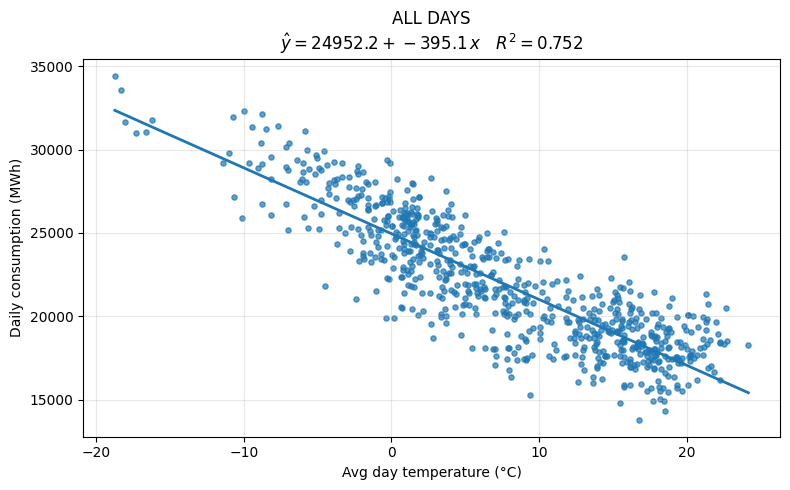

[saved] output\regression_workdays.png


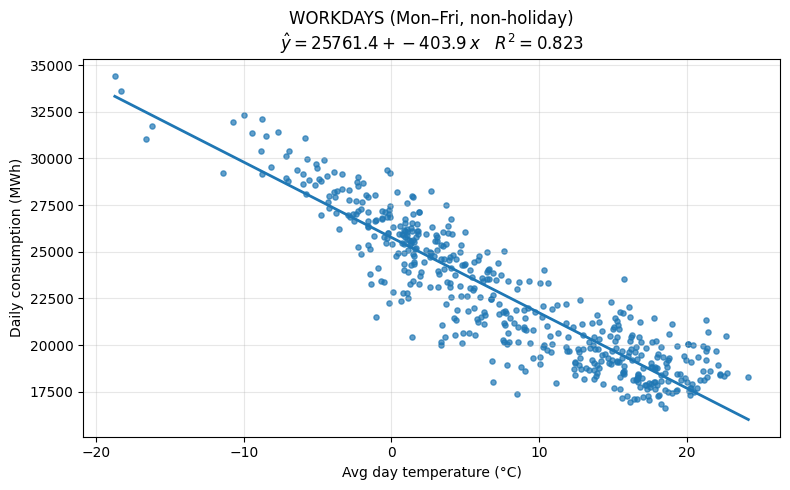

[saved] output\regression_offdays.png


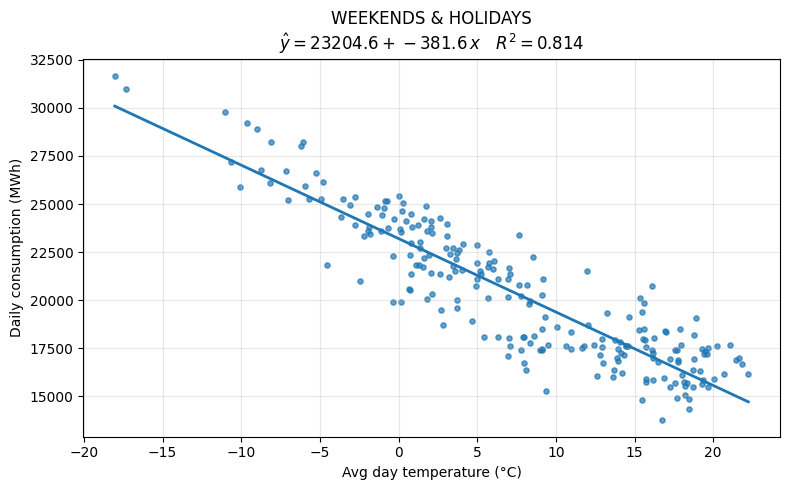

=== MERGED (FULL DATASET): shape === (731, 5)
=== MERGED (FULL DATASET): date range === 2023-09-23 00:00:00 → 2025-09-22 00:00:00

=== MERGED (FULL DATASET): dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
hour_day_value               Float64
is_weekend                      bool
is_holiday                      bool
dtype: object

=== MERGED (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   hour_day_value      731 non-null    Float64       
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: Float64(1), bool(2), datetime64[ns](1), float64(1)
memory usage: 19.4 KB

[saved] output

In [5]:
# --- Regression (daily): preview (exact last 30 days) + fit + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
N_DAYS = 30               # exact number of days to preview (inclusive window)
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from regression_analysis import load_daily_frames, run_linreg
except Exception as e:
    raise ImportError(f"Could not import regression_analysis.py from {SCRIPTS_DIR}: {e}")

if not isinstance(N_DAYS, int) or N_DAYS <= 0:
    raise ValueError("N_DAYS must be a positive integer (e.g., 30).")

# 1) Load merged daily frame (consumption + temperature, EE calendar)
merged = load_daily_frames(months=MONTHS, exclude_today=EXCLUDE_TODAY, tz=TZ).copy()
if merged.empty:
    raise RuntimeError("Merged dataset is empty. Verify upstream steps and parameters (MONTHS, TZ, EXCLUDE_TODAY).")

# Ensure required columns exist
need_cols = {"sum_cons_date", "sum_el_daily_value", "hour_day_value"}
missing = need_cols - set(merged.columns)
if missing:
    raise KeyError(f"Merged dataset is missing required column(s): {sorted(missing)}")

# Normalize types for safe slicing & math
merged["sum_cons_date"] = pd.to_datetime(merged["sum_cons_date"], errors="coerce")
merged["sum_el_daily_value"] = pd.to_numeric(merged["sum_el_daily_value"], errors="coerce")
merged["hour_day_value"] = pd.to_numeric(merged["hour_day_value"], errors="coerce")
merged = merged.sort_values("sum_cons_date").reset_index(drop=True)

# 2) Preview window: EXACT last N_DAYS (inclusive slice)
idxed = merged.set_index("sum_cons_date").sort_index()
end_d = idxed.index.max()
if pd.isna(end_d):
    raise RuntimeError("No valid dates found in merged dataset.")
start_d = end_d - pd.Timedelta(days=N_DAYS - 1)  # inclusive start..end -> exactly N_DAYS rows when history allows
last_nd = idxed.loc[start_d:end_d].reset_index()
print(f"Rows in preview: {len(last_nd)} (target: {N_DAYS})  window: {start_d.date()} … {end_d.date()}")

display(last_nd)

# 3) Fit regression(s)
def _fit_and_pack(df: pd.DataFrame, label: str) -> dict:
    """Fit using run_linreg and pack metrics into a dict (drops NA rows for x/y)."""
    sub = df.dropna(subset=["hour_day_value", "sum_el_daily_value"]).copy()
    if sub.empty or sub["hour_day_value"].nunique() < 2:
        return {
            "label": label, "slope": np.nan, "intercept": np.nan, "r": np.nan, "r2": np.nan,
            "p_value": np.nan, "rmse": np.nan, "mae": np.nan, "nrows": len(sub),
            "date_min": df["sum_cons_date"].min(), "date_max": df["sum_cons_date"].max()
        }
    x = sub["hour_day_value"].to_numpy(dtype=float)
    y = sub["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)
    return {
        "label": label,
        "slope": slope,
        "intercept": intercept,
        "r": r,
        "r2": r2,
        "p_value": p,
        "rmse": rmse,
        "mae": mae,
        "nrows": len(sub),
        "date_min": sub["sum_cons_date"].min(),
        "date_max": sub["sum_cons_date"].max(),
    }

metrics_rows = []
# ALL days
metrics_rows.append(_fit_and_pack(merged, "ALL_DAYS"))

# Segments (if flags present)
has_flags = {"is_weekend", "is_holiday"}.issubset(merged.columns)
if has_flags:
    workdays = merged[(~merged["is_weekend"]) & (~merged["is_holiday"])].copy()
    offdays  = merged[( merged["is_weekend"]) | ( merged["is_holiday"])].copy()
    if not workdays.empty:
        metrics_rows.append(_fit_and_pack(workdays, "WORKDAYS"))
    if not offdays.empty:
        metrics_rows.append(_fit_and_pack(offdays, "WEEKENDS_HOLIDAYS"))

metrics_df = pd.DataFrame(metrics_rows)
display(metrics_df)

# 4) Plot: ALL days (scatter + fit line)
def _plot_scatter_fit(df: pd.DataFrame, title: str, path_png: Path | None = None) -> None:
    sub = df.dropna(subset=["hour_day_value", "sum_el_daily_value"]).copy()
    if sub.empty or sub["hour_day_value"].nunique() < 2:
        print(f"[warn] Not enough data to plot: {title}")
        return

    x = sub["hour_day_value"].to_numpy(dtype=float)
    y = sub["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)

    xline = np.linspace(np.nanmin(x), np.nanmax(x), 100)
    yline = intercept + slope * xline

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(x, y, s=14, alpha=0.7)
    ax.plot(xline, yline, linewidth=2)

    try:
        eq_text = rf"$\hat{{y}} = {intercept:.1f} + {slope:.1f}\,x$   $R^2={r2:.3f}$"
        ax.set_title(f"{title}\n{eq_text}")
    except Exception:
        ax.set_title(title)

    ax.set_xlabel("Avg day temperature (°C)")
    ax.set_ylabel("Daily consumption (MWh)")
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

    if path_png is not None:
        OUTDIR.mkdir(parents=True, exist_ok=True)
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)

_plot_scatter_fit(merged, "ALL DAYS", OUTDIR / "regression_all_days.png" if SAVE_PNG else None)

if has_flags:
    if not workdays.empty:
        _plot_scatter_fit(workdays, "WORKDAYS (Mon–Fri, non-holiday)",
                          OUTDIR / "regression_workdays.png" if SAVE_PNG else None)
    if not offdays.empty:
        _plot_scatter_fit(offdays, "WEEKENDS & HOLIDAYS",
                          OUTDIR / "regression_offdays.png" if SAVE_PNG else None)

# 5) Data types & quick info
print("=== MERGED (FULL DATASET): shape ===", merged.shape)
print("=== MERGED (FULL DATASET): date range ===", merged["sum_cons_date"].min(), "→", merged["sum_cons_date"].max())
print("\n=== MERGED (FULL DATASET): dtypes ===")
print(merged.dtypes)
print("\n=== MERGED (FULL DATASET): .info() ===")
merged.info()

# 6) Optional: save CSVs
if SAVE_CSV:
    merged.to_csv(OUTDIR / "reg_daily_merged_all.csv", index=False)
    last_nd.to_csv(OUTDIR / f"reg_daily_merged_last{N_DAYS}d_preview.csv", index=False)
    metrics_df.to_csv(OUTDIR / "regression_metrics.csv", index=False)
    print(f"\n[saved] {OUTDIR/'reg_daily_merged_all.csv'}")
    print(f"[saved] {OUTDIR/f'reg_daily_merged_last{N_DAYS}d_preview.csv'}")
    print(f"[saved] {OUTDIR/'regression_metrics.csv'}")


## How to use — Bias correction factors

**What this cell does**
- Calls `bias_analysis.get_bias_factors(mode, segmented, months, exclude_today)` to compute **bias correction factors** (multipliers):
  - `mode="season"` → factors per **season** (`winter`, `spring`, `summer`, `autumn`)
  - `mode="month"`  → factors per **month** (`1..12`)
  - `segmented=True` → separate factors for **workday/offday** (keys like `workday:winter`, `offday:7`)
- Displays the **factor table** and a **bar chart**, prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves:
  - the factor **table (CSV)** to `./output/`,
  - the factor **map (JSON)** to `./output/`,
  - the **plot (PNG)** to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `bias_analysis.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`.
- Units: **consumption in MWh**, **temperature in °C**.
- Today is **excluded** by default (`exclude_today=True`) to avoid partial daily data.

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"`.
- `SEGMENTED`: `True` to compute separate factors for workday vs offday.
- `MONTHS`: how much history to use (e.g., `24`).
- `EXCLUDE_TODAY`: keep `True` to avoid partial data for the last day.
- `SAVE_CSV`, `SAVE_JSON`, `SAVE_PNG`: whether to write outputs to `./output/`.

**Run**
- Execute the cell; you’ll see:
  - a **table** of bias factors (with supporting stats),
  - a **bar chart** (per season or per month; segmented charts show both segments),
  - printed **data types (`.dtypes`)** and **`.info()`**,
  - printed **meta** (time window used, segmentation flag).

**Outputs (if saving is enabled)**
- `output/bias_<mode>[_seg]_TABLE_<YYYYMMDD>_<YYYYMMDD>.csv`
- `output/bias_<mode>[_seg]_FACTORS_<YYYYMMDD>_<YYYYMMDD>.json`
- `output/bias_<mode>[_seg]_PLOT_<YYYYMMDD>_<YYYYMMDD>.png`

**Apply to a forecast (example)**
- Use  
  `bias_analysis.apply_bias_to_forecast(df, predicted_col="yhat_consumption", date_col="date_local", factors=factors, mode=BIAS_MODE, segmented=SEGMENTED)`  
  to produce a **bias-adjusted** prediction column (`yhat_consumption * bias_factor`).

**Troubleshooting**
- *ImportError:* ensure `bias_analysis.py` is reachable from the notebook’s working directory.
- *Season labels not in English:* restart the kernel or reload the module after changing `SEASON_MAP` to English; alternatively remap labels in the notebook before plotting.
- *Empty/odd outputs:* adjust `MONTHS`, confirm upstream regression/merging works, and keep all timestamps in **Europe/Tallinn**.


=== META ===
{'mode': 'season', 'segmented': True, 'months': 24, 'exclude_today': True, 'tz': 'Europe/Tallinn', 'period_start': '20230923', 'period_end': '20250923'}

=== FACTOR TABLE (head) ===


,segment,season,avg_bias_factor,std_ratio,p25,p50,p75,count
0,offday,winter,0.956722,0.046291,0.926901,0.963972,0.992135,59
1,offday,spring,0.874514,0.063801,0.827400,0.873238,0.922697,57
2,offday,summer,0.929251,0.075366,0.877778,0.925889,0.986580,59
3,offday,autumn,0.938412,0.076579,0.905277,0.947350,0.980773,52
4,workday,winter,1.065998,0.048998,1.042423,1.068855,1.094161,122
5,workday,spring,0.981949,0.074671,0.931471,0.979316,1.031625,127
6,workday,summer,1.050161,0.081097,0.993598,1.040367,1.105897,125
7,workday,autumn,1.042324,0.062836,1.001328,1.050486,1.078768,130



=== FACTOR MAP (first 12 keys) ===


,key,factor
3,offday:autumn,0.938412
1,offday:spring,0.874514
2,offday:summer,0.929251
0,offday:winter,0.956722
7,workday:autumn,1.042324
5,workday:spring,0.981949
6,workday:summer,1.050161
4,workday:winter,1.065998


[saved] output\bias_season_seg_PLOT_20230923_20250923.png


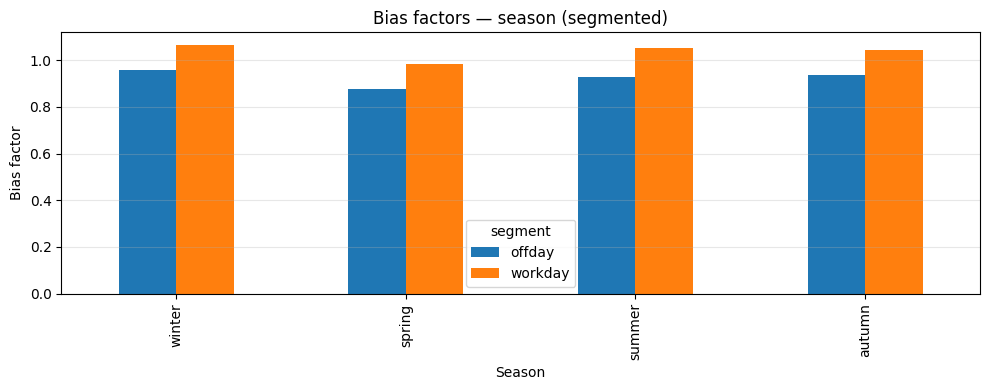


=== TABLE (FULL DATASET): dtypes ===
segment              object
season             category
avg_bias_factor     float64
std_ratio           float64
p25                 float64
p50                 float64
p75                 float64
count                 int64
dtype: object

=== TABLE (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   segment          8 non-null      object  
 1   season           8 non-null      category
 2   avg_bias_factor  8 non-null      float64 
 3   std_ratio        8 non-null      float64 
 4   p25              8 non-null      float64 
 5   p50              8 non-null      float64 
 6   p75              8 non-null      float64 
 7   count            8 non-null      int64   
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 792.0+ bytes
[saved] output\bias_season_seg_TABL

In [6]:
# --- Bias correction factors: table + plot + dtypes + optional CSV/JSON/PNG (robust) ---
from pathlib import Path
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"   # 'season' or 'month'
SEGMENTED = True       # True -> separate factors for workday/offday
MONTHS = 24
EXCLUDE_TODAY = True
SAVE_CSV = True
SAVE_JSON = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from bias_analysis import get_bias_factors, apply_bias_to_forecast
except Exception as e:
    raise ImportError(f"Could not import bias_analysis.py from {SCRIPTS_DIR}: {e}")

# Validate parameters early
if BIAS_MODE not in {"season", "month"}:
    raise ValueError("BIAS_MODE must be 'season' or 'month'.")
if not isinstance(SEGMENTED, bool):
    raise ValueError("SEGMENTED must be a boolean.")

# 1) Compute bias factors
factors, meta, table = get_bias_factors(
    mode=BIAS_MODE,
    segmented=SEGMENTED,
    months=MONTHS,
    exclude_today=EXCLUDE_TODAY,
)

# Guard: empty table
if table is None or table.empty:
    raise RuntimeError("Bias table is empty. Increase MONTHS or check upstream regression data.")

# Normalize columns for plotting/sorting
table = table.copy()

# Ensure numeric type for plotting
if "avg_bias_factor" in table.columns:
    table["avg_bias_factor"] = pd.to_numeric(table["avg_bias_factor"], errors="coerce")

# Season ordering detection (supports English or Estonian labels)
SEASON_ORDER_EN = ["winter", "spring", "summer", "autumn"]
SEASON_ORDER_ET = ["talv", "kevad", "suvi", "sügis"]

if "season" in table.columns:
    seasons_present = pd.Series(table["season"].dropna().astype(str).unique()).tolist()
    if any(s in SEASON_ORDER_EN for s in seasons_present):
        season_order = [s for s in SEASON_ORDER_EN if s in seasons_present]
    elif any(s in SEASON_ORDER_ET for s in seasons_present):
        season_order = [s for s in SEASON_ORDER_ET if s in seasons_present]
    else:
        season_order = sorted(seasons_present)
    table["season"] = pd.Categorical(table["season"], season_order, ordered=True)

# Month as integer 1..12 for clean sorting/axis labels
if "month_num" in table.columns:
    table["month_num"] = pd.to_numeric(table["month_num"], errors="coerce").astype("Int64")

# Pretty-print meta (dataclass-safe)
print("=== META ===")
try:
    from dataclasses import asdict
    print(asdict(meta))
except Exception:
    print(meta)

# Show table and factor map preview
print("\n=== FACTOR TABLE (head) ===")
display(table.head(12))

print("\n=== FACTOR MAP (first 12 keys) ===")
fact_df = pd.DataFrame(list(factors.items()), columns=["key", "factor"]).sort_values("key")
display(fact_df.head(12))

# 2) Plot — bar chart for season or month, segmented-aware (pivot_table for safety)
OUTDIR.mkdir(parents=True, exist_ok=True)
png_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_PLOT_{meta.period_start}_{meta.period_end}.png"
png_path = OUTDIR / png_name

def _ensure_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    """Coerce all columns to numeric where possible; drop rows/cols that are entirely NaN afterwards."""
    df = df.apply(pd.to_numeric, errors="coerce")
    df = df.dropna(how="all", axis=0).dropna(how="all", axis=1)
    return df

def _plot_bias_table(tbl: pd.DataFrame, mode: str, segmented: bool, out_path=None):
    # If segmented requested but no 'segment' column present, fallback gracefully
    if segmented and "segment" not in tbl.columns:
        print("[warn] 'segment' column not found; plotting unsegmented factors instead.")
        segmented = False

    fig, ax = plt.subplots(figsize=(10, 4))

    if not segmented:
        if mode == "season":
            if "season" not in tbl.columns:
                raise KeyError("Expected 'season' column for season mode.")
            s = (tbl.set_index("season")["avg_bias_factor"]).sort_index()
            s = pd.to_numeric(s, errors="coerce").dropna()
            if s.empty:
                raise TypeError("No numeric data to plot (season, unsegmented).")
            s.plot(kind="bar", ax=ax)
            ax.set_xlabel("Season")
        else:  # month
            if "month_num" not in tbl.columns:
                raise KeyError("Expected 'month_num' column for month mode.")
            s = (tbl.set_index("month_num")["avg_bias_factor"]).sort_index()
            s = pd.to_numeric(s, errors="coerce").dropna()
            if s.empty:
                raise TypeError("No numeric data to plot (month, unsegmented).")
            s.plot(kind="bar", ax=ax)
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (unsegmented)")
    else:
        if mode == "season":
            if "season" not in tbl.columns:
                raise KeyError("Expected 'season' column for season mode.")
            pvt = (tbl.pivot_table(index="season", columns="segment",
                                   values="avg_bias_factor", aggfunc="mean")
                     .sort_index())
            # enforce detected season order if available
            if isinstance(tbl["season"].dtype, pd.CategoricalDtype):
                pvt = pvt.reindex(tbl["season"].cat.categories)
            pvt = _ensure_numeric_df(pvt)
            if pvt.empty:
                raise TypeError("No numeric data to plot (season, segmented).")
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Season")
        else:  # month
            if "month_num" not in tbl.columns:
                raise KeyError("Expected 'month_num' column for month mode.")
            pvt = (tbl.pivot_table(index="month_num", columns="segment",
                                   values="avg_bias_factor", aggfunc="mean")
                     .sort_index())
            pvt = _ensure_numeric_df(pvt)
            if pvt.empty:
                raise TypeError("No numeric data to plot (month, segmented).")
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (segmented)")

    ax.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    if out_path is not None:
        fig.savefig(out_path, dpi=FIG_DPI)
        print(f"[saved] {out_path}")
    plt.show()

_plot_bias_table(table, BIAS_MODE, SEGMENTED, png_path if SAVE_PNG else None)

# 3) Data types & quick info
print("\n=== TABLE (FULL DATASET): dtypes ===")
print(table.dtypes)
print("\n=== TABLE (FULL DATASET): .info() ===")
table.info()

# 4) Optional: save artifacts (CSV + JSON factor map)
if SAVE_CSV:
    csv_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_TABLE_{meta.period_start}_{meta.period_end}.csv"
    csv_path = OUTDIR / csv_name
    table.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")

if SAVE_JSON:
    json_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_FACTORS_{meta.period_start}_{meta.period_end}.json"
    json_path = OUTDIR / json_name
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(factors, f, ensure_ascii=False, indent=2)
    print(f"[saved] {json_path}")

# 5) (Optional) How to apply to a forecast — small demo (commented)
# from el_consumption_forecast import forecast_next7
# daily_fc = forecast_next7(
#     mode=BIAS_MODE,
#     segmented_bias=SEGMENTED,      # if SEGMENTED=True you likely want forecast rows to carry 'segment'
#     months_hist=MONTHS,
# )
# daily_fc_bias = apply_bias_to_forecast(
#     df=daily_fc,
#     predicted_col="yhat_consumption",
#     date_col="date_local",
#     factors=factors,
#     mode=BIAS_MODE,
#     segmented=SEGMENTED,
#     out_col="yhat_consumption_bias_adj",  # TIP: align this with your final pipeline column naming
# )
# display(daily_fc_bias)


## How to use — Temperature forecast (next 7 days)

**What this cell does**
- Calls `temp_forecast.get_next7_forecast(...)` to fetch a **7-day temperature forecast** as **daily averages** on the **Europe/Tallinn** calendar (exactly **tomorrow → +6 days**, i.e., 7 **complete** future days).
- Displays the **7 forecast rows**, draws a **line chart** of `EE_avg`, prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/temp_forecast_daily_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`  
    *(dates are taken from the forecast index for accuracy)*  
  - the figure PNG to `./output/temp_forecast_daily_next7.png`.

**Before you run**
- Place the notebook in the **same folder** as `temp_forecast.py`.
- Required packages: `pandas`, `matplotlib`, `meteostat`.
- Units: **temperature in °C**. All dates are **Europe/Tallinn** local calendar days.

**Parameters in the cell**
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.
- Optional: pass custom Meteostat `Point`s via `get_next7_forecast(points=...)`.

**Run**
- Execute the cell. You’ll see:
  - the **7-row** table with `EE_avg` and city columns,
  - a **line chart** of `EE_avg`,
  - printed **data types (`.dtypes`)** and **`.info()`**.

**Customize**
- Show only specific cities: select columns after loading (e.g., `df[["Tallinn", "EE_avg"]]`).
- Prefer bars? Use `df["EE_avg"].plot(kind='bar', ...)` instead of the line plot.
- Overlay city lines: after plotting `EE_avg`, run `df[city_cols].plot(ax=ax)`.

**Troubleshooting**
- *ImportError:* ensure `temp_forecast.py` is in the working directory or adjust `sys.path`.
- *Empty output:* Meteostat may be temporarily unavailable or returned no values.

**Sanity-check (optional)**
- Assert the forecast has **exactly 7 rows** and starts **tomorrow**:  
  `assert len(df.index) == 7` and  
  `assert df.index.min().date() == (pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)).date()`


,date_local,Tallinn,Tartu,Pärnu,Narva,Kuressaare,EE_avg
0,2025-09-24,10.3,7.6,10.1,8.4,10.5,9.4
1,2025-09-25,10.3,8.7,10.7,9.8,8.1,9.5
2,2025-09-26,11.5,10.6,12.3,11.2,11.8,11.5
3,2025-09-27,11.4,10.9,12.4,10.7,10.8,11.2
4,2025-09-28,11.5,10.3,12.2,10.2,11.2,11.1
5,2025-09-29,11.2,9.4,12.3,10.0,11.8,10.9
6,2025-09-30,10.9,9.1,11.4,9.7,12.2,10.7


=== TEMP FORECAST: shape === (7, 6)
=== TEMP FORECAST: date range === 2025-09-24 00:00:00+03:00 → 2025-09-30 00:00:00+03:00

=== TEMP FORECAST: dtypes ===
Tallinn       Float64
Tartu         Float64
Pärnu         Float64
Narva         Float64
Kuressaare    Float64
EE_avg        Float64
dtype: object

=== TEMP FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2025-09-24 00:00:00+03:00 to 2025-09-30 00:00:00+03:00
Freq: D
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tallinn     7 non-null      Float64
 1   Tartu       7 non-null      Float64
 2   Pärnu       7 non-null      Float64
 3   Narva       7 non-null      Float64
 4   Kuressaare  7 non-null      Float64
 5   EE_avg      7 non-null      Float64
dtypes: Float64(6)
memory usage: 434.0 bytes
[saved] output\temp_forecast_daily_next7_tallinn_20250924_20250930.csv
[saved] output\temp_forecast_daily_next7_20250924_20250930.png


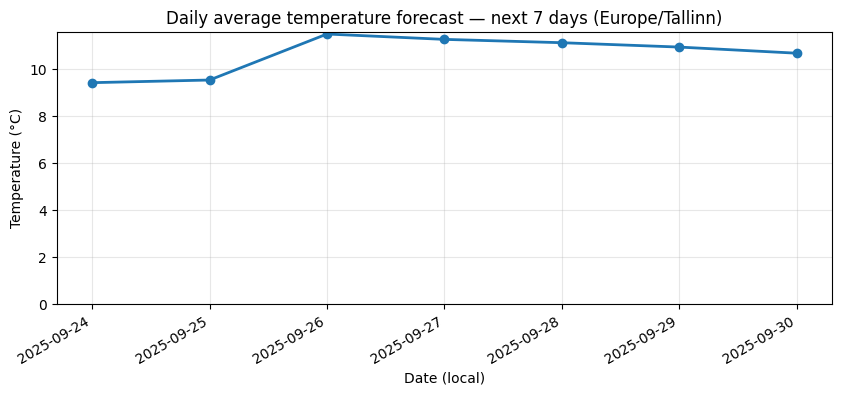

In [7]:
# --- Temperature forecast (next 7 days): table + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
TZ = "Europe/Tallinn"
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from temp_forecast import get_next7_forecast
except Exception as e:
    raise ImportError(f"Could not import temp_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Get forecast (7 rows, starting tomorrow; index is local calendar dates)
df = get_next7_forecast(tz=TZ).copy()
if df.empty:
    raise RuntimeError("Temperature forecast returned an empty DataFrame.")

# Ensure required column exists and is numeric
if "EE_avg" not in df.columns:
    raise KeyError("Expected column 'EE_avg' in the temperature forecast.")
df["EE_avg"] = pd.to_numeric(df["EE_avg"], errors="coerce")

# Identify city columns (all except EE_avg)
city_cols = [c for c in df.columns if c != "EE_avg"]

# Pretty print table (date as YYYY-MM-DD)
out_tbl = df.round(1).reset_index()
# the index name should be 'date_local' per module contract; ensure it exists
if "date_local" not in out_tbl.columns:
    out_tbl.rename(columns={out_tbl.columns[0]: "date_local"}, inplace=True)
out_tbl["date_local"] = pd.to_datetime(out_tbl["date_local"]).dt.strftime("%Y-%m-%d")
display(out_tbl[["date_local"] + city_cols + ["EE_avg"]])

# 2) Plot: EE_avg (line). Change to bar if preferred.
fig, ax = plt.subplots(figsize=(10, 4))

# Drop rows with NaN EE_avg for plotting
df_plot = df.dropna(subset=["EE_avg"]).copy()
if df_plot.empty:
    raise RuntimeError("All 'EE_avg' values are NaN — nothing to plot.")

y = df_plot["EE_avg"].to_numpy(dtype=float)
y_min = float(np.nanmin(y))
y_max = float(np.nanmax(y))

# Plot line
ax.plot(df_plot.index, y, marker="o", linewidth=2)

# Y-axis: start at 0 only if all temps >= 0; otherwise show negatives too
bottom = 0.0 if y_min >= 0 else y_min

# Add ~5% headroom at the top (fallback to +1 if flat series)
rng = max(1.0, (y_max - y_min))
pad = 0.05 * rng
top = y_max + pad
ax.set_ylim(bottom=bottom, top=top)

# Optional: draw a baseline at 0 °C when negatives exist (helps readability)
if y_min < 0 < y_max:
    ax.axhline(0, linewidth=1)

ax.set_title("Daily average temperature forecast — next 7 days (Europe/Tallinn)")
ax.set_xlabel("Date (local)")
ax.set_ylabel("Temperature (°C)")
ax.grid(True, alpha=0.3)
fig.autofmt_xdate()

# 3) Data types & quick info
print("=== TEMP FORECAST: shape ===", df.shape)
print("=== TEMP FORECAST: date range ===", df.index.min(), "→", df.index.max())
print("\n=== TEMP FORECAST: dtypes ===")
print(df.dtypes)
print("\n=== TEMP FORECAST: .info() ===")
df.info()

# Sanity-check: exactly 7 calendar days, starting tomorrow (local)
tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
idx_local = pd.to_datetime(df.index)  # daily local dates per module contract
# Compare as dates to avoid tz-naive vs tz-aware issues
assert len(idx_local) == 7, "Forecast should have 7 rows"
assert idx_local.min().date() == tomorrow_local.date(), "Forecast must start tomorrow (local)"
assert idx_local.max().date() == (tomorrow_local + pd.Timedelta(days=6)).date(), "Forecast must span 7 days"

# 4) Optional: save CSV/PNG with period taken from the actual DataFrame index
OUTDIR.mkdir(parents=True, exist_ok=True)

start = pd.to_datetime(df.index.min())
end   = pd.to_datetime(df.index.max())
s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")

if SAVE_CSV:
    out_tbl = df.round(1).reset_index()
    if "date_local" not in out_tbl.columns:
        out_tbl.rename(columns={out_tbl.columns[0]: "date_local"}, inplace=True)
    out_tbl["date_local"] = pd.to_datetime(out_tbl["date_local"]).dt.strftime("%Y-%m-%d")
    csv_path = OUTDIR / f"temp_forecast_daily_next7_tallinn_{s_str}_{e_str}.csv"
    out_tbl.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")

if SAVE_PNG:
    png_path = OUTDIR / f"temp_forecast_daily_next7_{s_str}_{e_str}.png"
    fig.savefig(png_path, dpi=FIG_DPI)
    print(f"[saved] {png_path}")


## How to use — Daily consumption forecast (next 7 days)

**What this cell does**
- Calls `el_consumption_forecast.forecast_next7(...)` to produce a **7-day daily consumption forecast** covering **7 complete local days starting tomorrow** (Europe/Tallinn).
- The output column **`yhat_consumption`** is **bias-adjusted** according to your settings (`BIAS_MODE`, `SEGMENTED_BIAS`).
- Displays the **7 forecast rows**, draws a **dual-axis chart** (bars = consumption, line = temperature), and prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/forecast_consumption_daily_next7_{mode_tag}_tallinn_YYYYMMDD_YYYYMMDD.csv`  
    where `{mode_tag}` is `season` or `month`, with `'_seg'` appended if `SEGMENTED_BIAS=True`
  - the figure PNG to `./output/forecast_consumption_daily_next7.png`.

**Before you run**
- Keep the notebook in the **same folder** as `el_consumption_forecast.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`, `holidays` (EE holidays), `meteostat`.
- **Units:** consumption in **MWh**, temperature in **°C**. All dates/times use **Europe/Tallinn**.

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"` — which bias factors to apply.
- `SEGMENTED_BIAS`: `True` applies bias by segment (`workday`/`offday`) *and* by season/month; `False` ignores segment.
- `MONTHS_HIST`: how much history to use for regressions and bias (in months).
- `TEMP_MODULE` / `TEMP_CSV`: temperature forecast source (module or CSV).  
  If you pass `TEMP_CSV`, ensure it has **exactly 7 rows** for **tomorrow…+6**, aligned to **local midnight**, with columns like `date_local` and `EE_avg`.
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.

**Run**
- Execute the cell. You’ll see:
  - a **7-row** table (e.g., `date_local`, `yhat_consumption`, `EE_avg_temp_C`, `segment`, `season`, `bias_factor`, …; inclusive window: *end − 6 days … end → 7 rows*),
  - a **dual-axis** chart (left axis = MWh bars, right axis = °C line),
  - printed **data types (`.dtypes`)** and **`.info()`**.

**Outputs (if saving is enabled)**
- `output/forecast_consumption_daily_next7_{mode_tag}_tallinn_YYYYMMDD_YYYYMMDD.csv`
- `output/forecast_consumption_daily_next7.png`

**Customize**
- Switch bias mode: set `BIAS_MODE = "month"` or `"season"`.
- Turn segmented bias off: `SEGMENTED_BIAS = False`.
- Provide an explicit temperature source: set `TEMP_MODULE = "temp_forecast.py"` or `TEMP_CSV = "path/to/temp.csv"`.
- Prefer a different file naming scheme? Adjust the save block to omit `{mode_tag}` or to include additional tags.

**Troubleshooting**
- *ImportError:* ensure `el_consumption_forecast.py` and its dependencies are reachable.
- *7-day window check fails:* confirm the temperature forecast covers **7 complete local days** starting **tomorrow**, and that time zones are consistent (`Europe/Tallinn`).
- *Missing columns or NaN values:* verify upstream regression, bias factors, and temperature inputs; ensure season labels match what your bias map expects (English vs Estonian).


,date_local,weekday,is_weekend,is_holiday,segment,season,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-24 00:00:00+03:00,Wednesday,False,False,workday,autumn,9,9.40,workday:autumn,1.042324,21964.17,22893.79
1,2025-09-25 00:00:00+03:00,Thursday,False,False,workday,autumn,9,9.52,workday:autumn,1.042324,21918.73,22846.43
2,2025-09-26 00:00:00+03:00,Friday,False,False,workday,autumn,9,11.47,workday:autumn,1.042324,21128.18,22022.42
3,2025-09-27 00:00:00+03:00,Saturday,True,False,offday,autumn,9,11.24,offday:autumn,0.938412,18912.94,17748.12
4,2025-09-28 00:00:00+03:00,Sunday,True,False,offday,autumn,9,11.10,offday:autumn,0.938412,18967.00,17798.86
5,2025-09-29 00:00:00+03:00,Monday,False,False,workday,autumn,9,10.92,workday:autumn,1.042324,21352.32,22256.05
6,2025-09-30 00:00:00+03:00,Tuesday,False,False,workday,autumn,9,10.66,workday:autumn,1.042324,21457.66,22365.84


Bias coverage: 7/7 (100.0%)
[saved] output\forecast_consumption_daily_next7.png


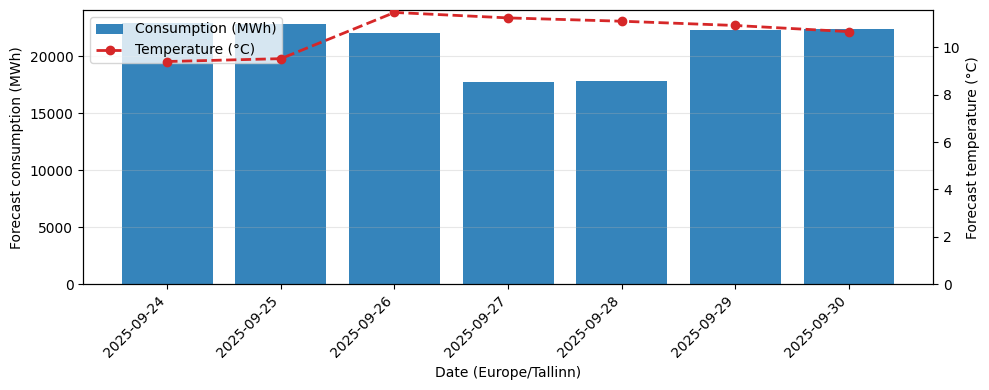

=== DAILY FORECAST: shape === (7, 12)
=== DAILY FORECAST: date range === 2025-09-24 00:00:00+03:00 → 2025-09-30 00:00:00+03:00

=== DAILY FORECAST: dtypes ===
date_local          datetime64[ns, Europe/Tallinn]
weekday                                     object
is_weekend                                    bool
is_holiday                                    bool
segment                                     object
season                                      object
month_num                                    int32
EE_avg_temp_C                              float64
bias_key                                    object
bias_factor                                float64
yhat_base                                  float64
yhat_consumption                           float64
dtype: object

=== DAILY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype                         
---  ------

In [8]:
# --- Daily consumption forecast (next 7 days): table + plot + dtypes + optional CSV/PNG (hardened) ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"       # 'season' or 'month'
SEGMENTED_BIAS = True      # apply segment-specific bias (workday/offday)
MONTHS_HIST = 24           # history used to fit regressions and bias
TEMP_MODULE = "temp_forecast.py"  # None to auto-detect, or path/module name
TEMP_CSV = None            # alternative CSV path (string) if you prefer CSV
SAVE_CSV = True
SAVE_PNG = True
TZ = "Europe/Tallinn"
OUTDIR = Path("output")
FIG_DPI = 130

# --- Early validation ---
if BIAS_MODE not in {"season", "month"}:
    raise ValueError("BIAS_MODE must be 'season' or 'month'.")
if not isinstance(SEGMENTED_BIAS, bool):
    raise ValueError("SEGMENTED_BIAS must be a boolean.")
if not isinstance(MONTHS_HIST, int) or MONTHS_HIST <= 0:
    raise ValueError("MONTHS_HIST must be a positive integer.")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from el_consumption_forecast import forecast_next7
except Exception as e:
    raise ImportError(f"Could not import el_consumption_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Run forecast (7 rows, starting tomorrow, Europe/Tallinn)
out = forecast_next7(
    mode=BIAS_MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
).copy()

# 1a) Require columns & coerce numerics for plotting/validation
REQUIRED = {"date_local", "yhat_consumption", "EE_avg_temp_C"}
missing_cols = REQUIRED - set(out.columns)
if missing_cols:
    raise RuntimeError(f"Forecast is missing required column(s): {sorted(missing_cols)}")

out["yhat_consumption"] = pd.to_numeric(out["yhat_consumption"], errors="coerce")
out["EE_avg_temp_C"]    = pd.to_numeric(out["EE_avg_temp_C"], errors="coerce")

# --- Sanity checks: 7 complete days starting tomorrow (local) ---
dates = pd.to_datetime(out["date_local"], errors="coerce")
if dates.isna().any():
    n = int(dates.isna().sum())
    raise RuntimeError(f"'date_local' has {n} unparsable value(s).")

if dates.dt.tz is None:
    dates = dates.dt.tz_localize(TZ)
else:
    dates = dates.dt.tz_convert(TZ)

if len(out) != 7:
    raise RuntimeError(f"Expected 7 rows, got {len(out)}.")

# duplicates check (should not happen, but helps debugging)
dups = pd.Series(dates.dt.normalize()).duplicated().sum()
if dups:
    print(f"[warn] Found {dups} duplicated date(s) in forecast.")

tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
expected = pd.date_range(start=tomorrow_local, periods=7, freq="D", tz=TZ)

# Compare normalized dates irrespective of order
if not dates.dt.normalize().sort_values().reset_index(drop=True).equals(
        expected.normalize().to_series().reset_index(drop=True)):
    raise RuntimeError("Forecast must cover 7 consecutive complete days starting tomorrow (Europe/Tallinn).")

# Ensure sorted by date for display/plot/save
out["date_local"] = dates
out = out.sort_values("date_local").reset_index(drop=True)

display(out)

# >>> (1) Bias coverage log — before plotting
try:
    from bias_analysis import get_bias_factors
    factors, _meta, _tbl = get_bias_factors(
        mode=BIAS_MODE, segmented=SEGMENTED_BIAS, months=MONTHS_HIST
    )
    if "bias_key" in out.columns:
        keys = out["bias_key"].astype(str).tolist()
        hits = sum(k in factors for k in keys)
        missing = sorted({k for k in keys if k not in factors})
        pct = 100.0 * hits / len(keys) if len(keys) else 0.0
        print(f"Bias coverage: {hits}/{len(keys)} ({pct:.1f}%)")
        if missing:
            print(f"[warn] Missing factor keys: {', '.join(missing)}")
    else:
        print("[warn] Column 'bias_key' not found in forecast output.")
except Exception as e:
    print(f"[warn] Could not compute bias coverage: {e}")

# >>> (2) NaN guards
if out["yhat_consumption"].isna().any():
    n = int(out["yhat_consumption"].isna().sum())
    print(f"[warn] {n} row(s) are NaN in 'yhat_consumption' "
          f"(possible missing temperature or unmatched factors).")
if out["EE_avg_temp_C"].isna().any():
    m = int(out["EE_avg_temp_C"].isna().sum())
    print(f"[warn] {m} row(s) have NaN in 'EE_avg_temp_C'.")

# 2) Plot (dual-axis: bars = yhat_consumption, line = EE_avg_temp_C)
def dual_axis_daily_plot(df: pd.DataFrame, path_png=None, temp_color="tab:red"):
    dts = pd.to_datetime(df["date_local"])
    x = np.arange(len(dts))
    y_cons = df["yhat_consumption"].to_numpy(dtype=float)
    y_temp = df["EE_avg_temp_C"].to_numpy(dtype=float)

    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Bars: consumption (set lower zorder so the line can sit on top)
    bars = ax1.bar(x, y_cons, label="Consumption (MWh)", zorder=1, alpha=0.9)
    ax1.set_ylabel("Forecast consumption (MWh)")
    ax1.set_ylim(bottom=0)
    ax1.grid(True, axis="y", alpha=0.3)

    # Line: temperature on twin axis
    ax2 = ax1.twinx()
    ax2.set_zorder(ax1.get_zorder() + 1)
    ax2.patch.set_visible(False)

    if not np.isnan(y_temp).all():
        (ln,) = ax2.plot(
            x, y_temp,
            marker="o", linestyle="--", linewidth=2,
            color=temp_color, label="Temperature (°C)", zorder=3
        )
        ax2.set_ylim(bottom=min(0.0, float(np.nanmin(y_temp))))
    else:
        ln = None

    ax2.set_ylabel("Forecast temperature (°C)")

    # X ticks as dates
    ax1.set_xticks(x)
    ax1.set_xticklabels([d.strftime("%Y-%m-%d") for d in dts], rotation=45, ha="right")
    ax1.set_xlabel("Date (Europe/Tallinn)")
    plt.tight_layout()

    # One combined legend (if temp line exists)
    if ln is not None:
        ax1.legend([bars, ln], ["Consumption (MWh)", "Temperature (°C)"], loc="upper left")
    else:
        ax1.legend([bars], ["Consumption (MWh)"], loc="upper left")

    if path_png is not None:
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)
png_path = OUTDIR / "forecast_consumption_daily_next7.png" if SAVE_PNG else None
dual_axis_daily_plot(out, png_path)

# 3) Data types & quick info
print("=== DAILY FORECAST: shape ===", out.shape)
print("=== DAILY FORECAST: date range ===", out["date_local"].min(), "→", out["date_local"].max())
print("\n=== DAILY FORECAST: dtypes ===")
print(out.dtypes)
print("\n=== DAILY FORECAST: .info() ===")
out.info()

# 4) Optional: save CSV with period from the actual DataFrame
if SAVE_CSV:
    start = pd.to_datetime(out["date_local"]).min()
    end   = pd.to_datetime(out["date_local"]).max()
    s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")
    mode_tag = f"{BIAS_MODE}{'_seg' if SEGMENTED_BIAS else ''}"
    csv_path = OUTDIR / f"forecast_consumption_daily_next7_{mode_tag}_tallinn_{s_str}_{e_str}.csv"

    out_to_save = out.copy()
    out_to_save["date_local"] = pd.to_datetime(out_to_save["date_local"]).dt.strftime("%Y-%m-%d")
    out_to_save.to_csv(csv_path, index=False)
    print(f"\n[saved] {csv_path}")


## How to use — Weekday load profiles (24×7 share matrix)

**What this cell does**
- Builds a **24×7 matrix** of average hourly shares per weekday using `weekday_profile.get_weekday_hour_share_matrix(...)`.  
  Each weekday column sums to **1.0** (within rounding). Uses **Europe/Tallinn** time, is **DST-aware**, and by default excludes **today** and **EE public holidays** from training.
- Shows the **matrix preview** and the **days used** list (the last *N* dates per weekday).
- Draws a **heatmap** (hours × weekday) and prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves two CSVs to `./output/`: the **matrix** and the **days used**.

**Before you run**
- Place the notebook in the **same folder** as `weekday_profile.py` (and `elering_consumption.py` if you fetch hourly data via API).
- Required packages: `pandas`, `matplotlib`, and `holidays` (recommended for EE public holidays).
- Units: shares in the range **0…1** (dimensionless).

**Parameters in the cell**
- `LAST_N`: how many **most recent occurrences** of each weekday to average (e.g., `6`).
- `EXCLUDE_TODAY`: keep `True` to avoid today’s (potentially partial) day in training.
- `HOURLY_CSV` (optional): path to an hourly CSV; if omitted, the cell uses `elering_consumption.get_hourly_consumption(...)`.
- `CSV_TZ`: time zone to **interpret naive timestamps** in `HOURLY_CSV` (e.g., `"UTC"`).
- `MONTHS`: how much history to scan.
- `SAVE_CSV`: whether to save outputs to `./output/`.

**Run**
- Execute the cell; you’ll see:
  - the **24×7** matrix and the **days used** table,
  - a **heatmap** of shares,
  - printed **data types (`.dtypes`)** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/weekday_share_matrix_last{LAST_N}_months{MONTHS}.csv`
- `output/weekday_days_used_last{LAST_N}_months{MONTHS}.csv`

**Customize**
- Include or exclude **public holidays** in training by adjusting the holiday-filter logic in `weekday_profile.py` (note: `EXCLUDE_TODAY` only controls inclusion of **today**, not holidays).
- Train from a specific data dump: set `HOURLY_CSV="path/to/hourly.csv"` and `CSV_TZ="UTC"` if the file is UTC-naive.
- If a weekday is missing in your data window, the preview will still render (columns are reindexed to a fixed weekday order), but you’ll see a warning.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook folder.
- *Empty or non-24×7 matrix:* widen `MONTHS`, reduce `LAST_N`, or verify that “exclude today / exclude holidays” didn’t drop all rows. Also confirm that hourly input uses the intended time zone.

**Sanity-check (optional)**
- Verify shape and sums:  
  `assert matrix.shape == (24, 7)` and  
  `assert (matrix.sum(axis=0).round(6) == 1.0).all()`


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_local,,,,,,,
0,0.0331,0.0345,0.0355,0.0350,0.0362,0.0374,0.0382
1,0.0314,0.0329,0.0341,0.0332,0.0337,0.0361,0.0363
2,0.0308,0.0319,0.0331,0.0326,0.0327,0.0349,0.0352
3,0.0306,0.0315,0.0329,0.0326,0.0326,0.0342,0.0347
4,0.0309,0.0317,0.0331,0.0329,0.0330,0.0341,0.0346
5,0.0322,0.0333,0.0340,0.0338,0.0342,0.0345,0.0348
6,0.0364,0.0379,0.0392,0.0384,0.0382,0.0357,0.0359
7,0.0426,0.0439,0.0451,0.0441,0.0439,0.0383,0.0391
8,0.0472,0.0479,0.0478,0.0483,0.0473,0.0414,0.0424


,weekday,date_local
11,Monday,2025-09-22
23,Sunday,2025-09-21
17,Saturday,2025-09-20
5,Friday,2025-09-19
29,Thursday,2025-09-18
41,Wednesday,2025-09-17
35,Tuesday,2025-09-16
10,Monday,2025-09-15
22,Sunday,2025-09-14
16,Saturday,2025-09-13


Max |col_sum - 1.0| = 0.0


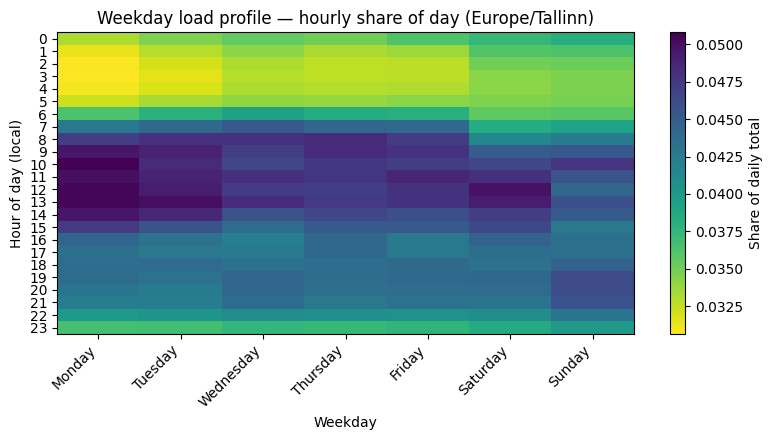


=== MATRIX (FULL DATASET): dtypes ===
weekday
Monday       float64
Tuesday      float64
Wednesday    float64
Thursday     float64
Friday       float64
Saturday     float64
Sunday       float64
dtype: object

=== DAYS USED (FULL DATASET): dtypes ===
weekday               object
date_local    datetime64[ns]
dtype: object

=== MATRIX (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monday     24 non-null     float64
 1   Tuesday    24 non-null     float64
 2   Wednesday  24 non-null     float64
 3   Thursday   24 non-null     float64
 4   Friday     24 non-null     float64
 5   Saturday   24 non-null     float64
 6   Sunday     24 non-null     float64
dtypes: float64(7)
memory usage: 1.4 KB

=== DAYS USED (FULL DATASET): .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 c

In [11]:
# --- Weekday load profiles: 24×7 share matrix + days used + heatmap + dtypes + optional CSV (hardened) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
LAST_N = 6
EXCLUDE_TODAY = True
HOURLY_CSV = None          # e.g., "output/elering_consumption_hourly_last24months_tallinn_*.csv"
CSV_TZ = "Europe/Tallinn"  # if HOURLY_CSV has tz-naive timestamps, set their zone (e.g. "UTC")
MONTHS = 24
SAVE_CSV = True
OUTDIR = Path("output")
FIGSIZE = (8, 4.5)
TOL = 1e-3                 # tolerance for column-sum ~= 1.0

# --- Early validation ---
if not isinstance(LAST_N, int) or LAST_N <= 0:
    raise ValueError("LAST_N must be a positive integer (e.g., 6).")
if not isinstance(MONTHS, int) or MONTHS <= 0:
    raise ValueError("MONTHS must be a positive integer (e.g., 24).")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from weekday_profile import (
        get_weekday_hour_share_matrix,
        get_weekday_days_used,
        WEEKDAY_ORDER,
    )
except Exception as e:
    raise ImportError(f"Could not import weekday_profile.py from {SCRIPTS_DIR}: {e}")

# 1) Build matrix & days used
M = get_weekday_hour_share_matrix(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)
DU = get_weekday_days_used(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)

# Guards: empty frames
if M is None or M.empty:
    raise RuntimeError("Share matrix is empty. Try widening MONTHS, reducing LAST_N, or revisiting filters.")
if DU is None or DU.empty:
    print("[warn] Days-used table is empty. Profile may be built from a CSV slice without dates.")

# --- Safer preview: order columns by WEEKDAY_ORDER; guard missing weekdays
missing_cols = [w for w in WEEKDAY_ORDER if w not in M.columns]
if missing_cols:
    print(f"[warn] Missing weekday(s) in profile matrix: {missing_cols}")

M_plot = M.reindex(columns=WEEKDAY_ORDER)

# Ensure 24 hour rows in order if index is hours
try:
    M_plot = M_plot.reindex(index=range(24))
except Exception:
    # If index is already hours (0..23) or something else, keep as-is
    pass

# Coerce to numeric for validation/plotting; keep NaNs if any
M_plot = M_plot.apply(pd.to_numeric, errors="coerce")

# Preview tables
display(M_plot.round(4))

# Parse/preview DU safely (date_local expected)
DU = DU.copy()
if "date_local" in DU.columns:
    DU["date_local"] = pd.to_datetime(DU["date_local"], errors="coerce")
display(DU.sort_values("date_local", ascending=False).head(21))

# Quick validation: each weekday column should sum to ~1.0
col_sums = M_plot.sum(axis=0, skipna=True)
max_dev = float((col_sums - 1.0).abs().max()) if not col_sums.empty else float("nan")
print("Max |col_sum - 1.0| =", max_dev)
if max_dev > TOL:
    print(f"[warn] Column sums deviate from 1.0 by more than {TOL}. Check input window and holiday filters.")

if M_plot.shape[0] != 24:
    print(f"[warn] Expected 24 rows (hours), got {M_plot.shape[0]}.")
if M_plot.shape[1] != len(WEEKDAY_ORDER):
    print(f"[warn] Expected {len(WEEKDAY_ORDER)} columns (weekdays), got {M_plot.shape[1]}.")

# 2) Heatmap (hours × weekday)
fig, ax = plt.subplots(figsize=FIGSIZE)
data = M_plot.fillna(0.0).to_numpy(dtype=float)
im = ax.imshow(data, aspect="auto", origin="upper", cmap="viridis_r")
ax.set_title("Weekday load profile — hourly share of day (Europe/Tallinn)")
ax.set_xlabel("Weekday")
ax.set_ylabel("Hour of day (local)")
ax.set_xticks(range(len(WEEKDAY_ORDER)))
ax.set_xticklabels(WEEKDAY_ORDER, rotation=45, ha="right")
ax.set_yticks(range(24))
cbar = fig.colorbar(im, ax=ax, label="Share of daily total")
plt.tight_layout()
plt.show()

# 3) dtypes & info
print("\n=== MATRIX (FULL DATASET): dtypes ===")
print(M.dtypes)
print("\n=== DAYS USED (FULL DATASET): dtypes ===")
print(DU.dtypes)
print("\n=== MATRIX (FULL DATASET): .info() ===")
M.info()
print("\n=== DAYS USED (FULL DATASET): .info() ===")
DU.info()

# 4) Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    path_matrix = OUTDIR / f"weekday_share_matrix_last{LAST_N}_months{MONTHS}.csv"
    path_days   = OUTDIR / f"weekday_days_used_last{LAST_N}_months{MONTHS}.csv"
    M_plot.to_csv(path_matrix, index=True)
    DU.to_csv(path_days, index=False)
    print(f"\n[saved] {path_matrix}")
    print(f"[saved] {path_days}")


## How to use — Hourly consumption forecast (next 7 days)

**What this cell does**
- Calls `electricity_hourly_forecast.main(...)` to produce a **7-day hourly forecast** in **Europe/Tallinn**, covering **7 complete local days (tomorrow → +6)**.
- Under the hood it:
  1) obtains the **daily forecast** (from a CSV you provide or by calling `forecast_next7`),
  2) builds/uses **weekday load profiles** (DST-aware; EE public holidays handled),
  3) **splits** daily totals into hourly values and **verifies** that hourly sums match the daily totals.
- Shows a **scrollable preview (first 200 rows)**, runs a **sum check** (hourly → daily), draws a **line chart** for the **first forecast day**, and prints **data types (`.dtypes`) and `.info()`**.
- Optionally saves a CSV to `./output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv` *(dates are taken from the forecast window)*.

**Before you run**
- Keep the notebook in the **same folder** as `electricity_hourly_forecast.py` and its dependencies.
- Recommended packages: `pandas`, `matplotlib`, plus whatever your upstream scripts require (`holidays`, `meteostat`).
- **Units:** consumption in **MWh**. All timestamps are **Europe/Tallinn**; DST days may contain **23** or **25** hours.

**Parameters in the cell**
- `DAILY_CSV`: path to an existing **daily** forecast (must have **exactly 7 rows** covering **tomorrow…+6**, with at least `date_local` and `yhat_consumption`, **aligned to local midnight**). If `None`, the module computes one internally.
- `MODE` / `SEGMENTED_BIAS` / `MONTHS_HIST` / `TEMP_MODULE` / `TEMP_CSV`: forwarded to the daily-forecast step if `DAILY_CSV=None`.
- `LAST_N`, `HOLIDAY_PROFILE`, `HOURLY_CSV`, `CSV_TZ`, `MONTHS_FOR_PROFILE`: weekday-profile training options (`HOLIDAY_PROFILE` in `{'weekday','sunday','weekend_avg'}`).
- `SAVE_CSV`: if `True`, the module saves the hourly CSV to `./output/`.

**Run**
- Execute the cell. You’ll see:
  - a **scrollable preview** of the first rows (default: 200; around DST this may cover less/more than two full days),
  - a **sum check** (hourly → daily),
  - a **line chart** of the first forecast day,
  - printed **data types (`.dtypes`)** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`

**Customize**
- Provide a specific **daily forecast CSV** via `DAILY_CSV="path.csv"`.
- Train profiles from a specific hourly history dump via `HOURLY_CSV="path.csv"` and set `CSV_TZ` (e.g., `"UTC"`) if that file is tz-naive.
- Change the preview size (e.g., first 72 rows) or add more plots (overlay by day, heatmap).

**Troubleshooting**
- *ImportError:* ensure the script is reachable from the notebook working directory.
- *Sum mismatch:* verify the profile matrix and DST handling; malformed daily inputs or mismatched time zones can cause discrepancies.

**Sanity-check (optional)**
- Verify that hourly totals equal daily totals per day and that the window contains exactly 7 local days starting tomorrow.


[check] Hourly → daily reconciliation — max |rel_diff| ≈ 0.00000%

=== Hourly forecast (first 48 rows) ===
           datetime_local   weekday  hour_local  consumption_hourly segment season  EE_avg_temp_C  yhat_consumption  bias_factor
2025-09-24 00:00:00+03:00 Wednesday           0          811.894866 workday autumn           9.40          22893.79     1.042324
2025-09-24 01:00:00+03:00 Wednesday           1          781.220276 workday autumn           9.40          22893.79     1.042324
2025-09-24 02:00:00+03:00 Wednesday           2          758.922857 workday autumn           9.40          22893.79     1.042324
2025-09-24 03:00:00+03:00 Wednesday           3          753.461089 workday autumn           9.40          22893.79     1.042324
2025-09-24 04:00:00+03:00 Wednesday           4          758.673348 workday autumn           9.40          22893.79     1.042324
2025-09-24 05:00:00+03:00 Wednesday           5          777.933294 workday autumn           9.40          22893.79    

,datetime_local,weekday,hour_local,consumption_hourly,date_local,segment,season,is_weekend,is_holiday,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-24 00:00:00+03:00,Wednesday,0,811.894866,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
1,2025-09-24 01:00:00+03:00,Wednesday,1,781.220276,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
2,2025-09-24 02:00:00+03:00,Wednesday,2,758.922857,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
3,2025-09-24 03:00:00+03:00,Wednesday,3,753.461089,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
4,2025-09-24 04:00:00+03:00,Wednesday,4,758.673348,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
5,2025-09-24 05:00:00+03:00,Wednesday,5,777.933294,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
6,2025-09-24 06:00:00+03:00,Wednesday,6,898.332550,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
7,2025-09-24 07:00:00+03:00,Wednesday,7,1033.549318,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
8,2025-09-24 08:00:00+03:00,Wednesday,8,1094.875466,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79
9,2025-09-24 09:00:00+03:00,Wednesday,9,1079.071767,2025-09-24,workday,autumn,False,False,9,9.40,workday:autumn,1.042324,21964.17,22893.79


,date_local,sum_hourly,yhat_consumption,rel_diff
0,2025-09-24,22893.79,22893.79,0.0
1,2025-09-25,22846.43,22846.43,0.0
2,2025-09-26,22022.42,22022.42,0.0
3,2025-09-27,17748.12,17748.12,0.0
4,2025-09-28,17798.86,17798.86,0.0
5,2025-09-29,22256.05,22256.05,0.0
6,2025-09-30,22365.84,22365.84,0.0


Max |rel_diff| = 0.0


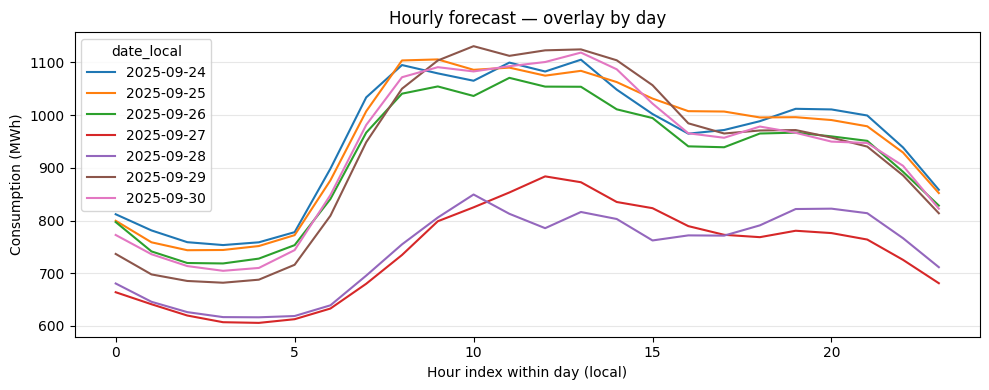

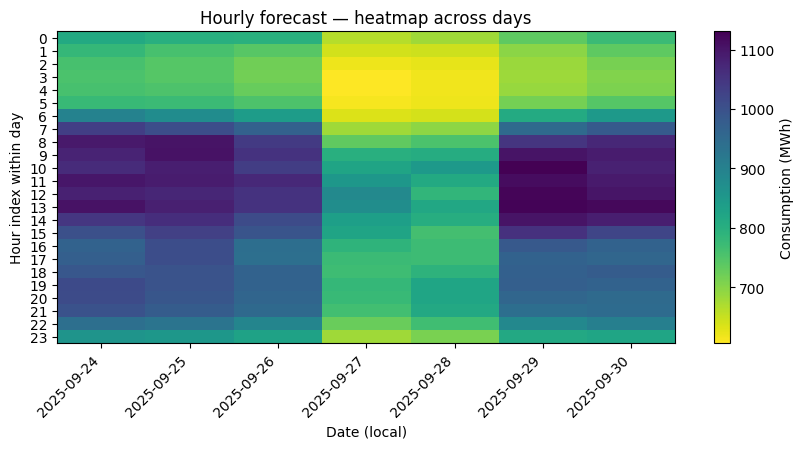

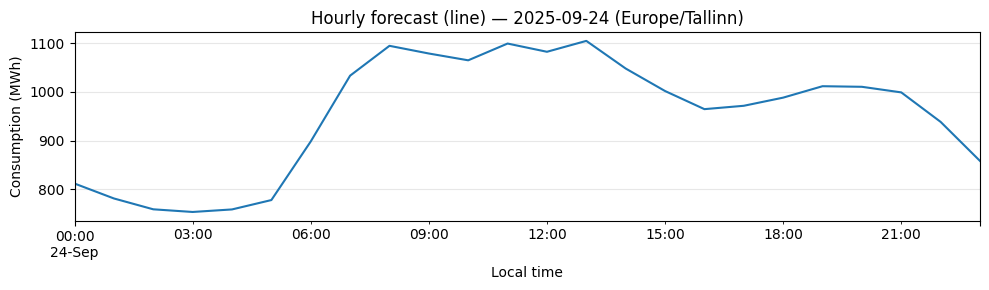


=== HOURLY FORECAST: dtypes ===
datetime_local        datetime64[ns, Europe/Tallinn]
weekday                                       object
hour_local                                     int64
consumption_hourly                           float64
date_local                                    object
segment                                       object
season                                        object
is_weekend                                      bool
is_holiday                                      bool
month_num                                      int32
EE_avg_temp_C                                float64
bias_key                                      object
bias_factor                                  float64
yhat_base                                    float64
yhat_consumption                             float64
dtype: object

=== HOURLY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column        

In [12]:
# --- Hourly forecast (next 7 days): scrollable preview + sum check + LINE plot + dtypes; optional CSV (hardened) ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# (A) Scrollable table helper – avoids truncation in notebooks
def display_scrollable_df(df: pd.DataFrame, n=200, max_height_px=360):
    html = df.head(n).to_html(border=0)
    display(HTML(f"<div style='max-height:{max_height_px}px; overflow:auto; border:1px solid #ddd; padding:6px'>{html}</div>"))

# (B) Pandas display options (adjust to taste)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 0)  # let it expand

# Parameters (forwarded to module when DAILY_CSV=None)
DAILY_CSV = None             # e.g., "output/forecast_consumption_daily_next7_..._tallinn_YYYYMMDD_YYYYMMDD.csv"
MODE = "season"              # 'season' | 'month'
SEGMENTED_BIAS = True
MONTHS_HIST = 24
TEMP_MODULE = "temp_forecast.py"
TEMP_CSV = None

LAST_N = 6
HOLIDAY_PROFILE = "weekday"  # 'weekday' | 'sunday' | 'weekend_avg'
HOURLY_CSV = None            # train profiles from a CSV dump
CSV_TZ = "Europe/Tallinn"    # set to "UTC" if HOURLY_CSV timestamps are naive UTC
MONTHS_FOR_PROFILE = 24
SAVE_CSV = True

# Sum-check tolerance (relative)
TOL_REL = 1e-4  # 0.01%

# --- Early parameter validation ---
if MODE not in {"season", "month"}:
    raise ValueError("MODE must be 'season' or 'month'.")
if HOLIDAY_PROFILE not in {"weekday", "sunday", "weekend_avg"}:
    raise ValueError("HOLIDAY_PROFILE must be one of {'weekday','sunday','weekend_avg'}.")
if not isinstance(SEGMENTED_BIAS, bool):
    raise ValueError("SEGMENTED_BIAS must be boolean.")
for name, val in {"MONTHS_HIST": MONTHS_HIST, "LAST_N": LAST_N, "MONTHS_FOR_PROFILE": MONTHS_FOR_PROFILE}.items():
    if not isinstance(val, int) or val <= 0:
        raise ValueError(f"{name} must be a positive integer.")

# Import module function
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))
try:
    from electricity_hourly_forecast import main as run_hourly
except Exception as e:
    raise ImportError(f"Could not import electricity_hourly_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Run hourly forecast
hourly = run_hourly(
    use_daily_csv=DAILY_CSV,
    mode=MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
    last_n=LAST_N,
    holiday_profile=HOLIDAY_PROFILE,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months_for_profile=MONTHS_FOR_PROFILE,
    save_csv=SAVE_CSV,
).copy()

if hourly.empty:
    raise RuntimeError("Hourly forecast returned an empty DataFrame.")

# 1a) Required columns & dtype coercion
REQ = {"datetime_local", "consumption_hourly"}
missing = REQ - set(hourly.columns)
if missing:
    raise RuntimeError(f"Hourly forecast is missing required columns: {sorted(missing)}")

if not pd.api.types.is_datetime64_any_dtype(hourly["datetime_local"]):
    hourly["datetime_local"] = pd.to_datetime(hourly["datetime_local"], errors="coerce")

hourly["consumption_hourly"] = pd.to_numeric(hourly["consumption_hourly"], errors="coerce")
if "yhat_consumption" in hourly.columns:
    hourly["yhat_consumption"] = pd.to_numeric(hourly["yhat_consumption"], errors="coerce")

# Sort and basic dup check on timestamps
hourly = hourly.sort_values("datetime_local").reset_index(drop=True)
dup_ts = hourly["datetime_local"].duplicated().sum()
if dup_ts:
    print(f"[warn] Found {dup_ts} duplicated hourly timestamps; downstream sums may double-count.")

# 1b) Sanity check — ensure 7 complete consecutive days starting tomorrow (Europe/Tallinn)
TZ = "Europe/Tallinn"
dates_unique = pd.to_datetime(hourly["datetime_local"]).dt.tz_convert(TZ).dt.normalize().drop_duplicates().sort_values()
tomorrow_local = pd.Timestamp.now(tz=TZ).normalize() + pd.Timedelta(days=1)
expected = pd.date_range(start=tomorrow_local, periods=7, freq="D", tz=TZ).normalize()

if len(dates_unique) != 7 or not dates_unique.reset_index(drop=True).equals(expected.to_series().reset_index(drop=True)):
    raise RuntimeError("Hourly forecast must span 7 consecutive complete local days starting tomorrow (Europe/Tallinn).")

# 2) Scrollable preview (first 200 rows)
display_scrollable_df(hourly, n=200, max_height_px=360)

# 3) Sum check: hours -> day
hourly["date_local"] = pd.to_datetime(hourly["datetime_local"]).dt.tz_convert(TZ).dt.strftime("%Y-%m-%d")
check = (hourly.groupby("date_local", as_index=False)["consumption_hourly"]
         .sum()
         .rename(columns={"consumption_hourly": "sum_hourly"}))

# Attach daily totals (from hourly or external DAILY_CSV)
if "yhat_consumption" in hourly.columns:
    daily_in_hourly = (hourly[["date_local", "yhat_consumption"]]
                       .drop_duplicates("date_local"))
    check = check.merge(daily_in_hourly, on="date_local", how="left")
elif DAILY_CSV:
    daily = pd.read_csv(DAILY_CSV)
    daily["date_local"] = pd.to_datetime(daily["date_local"], errors="coerce").dt.strftime("%Y-%m-%d")
    daily["yhat_consumption"] = pd.to_numeric(daily["yhat_consumption"], errors="coerce")
    check = check.merge(daily[["date_local", "yhat_consumption"]], on="date_local", how="left")

# Compute relative difference only if yhat is available
if "yhat_consumption" in check.columns and check["yhat_consumption"].notna().any():
    check["rel_diff"] = (check["sum_hourly"] / check["yhat_consumption"]) - 1.0
else:
    check["rel_diff"] = np.nan  # not available

display(check)

if check["rel_diff"].notna().any():
    max_rel = float(check["rel_diff"].abs().max())
    print("Max |rel_diff| =", max_rel)
    if max_rel > TOL_REL:
        print(f"[warn] Hourly→daily sum mismatch exceeds tolerance ({TOL_REL:.6f}). Check profiles/DST/time zones.")
else:
    print("Daily totals not provided — rel_diff not computed.")

# 4) Extra charts: (a) overlay by day on hour-index, (b) heatmap across days
h2 = hourly.copy()
h2["date_local"] = pd.to_datetime(h2["datetime_local"]).dt.tz_convert(TZ).dt.strftime("%Y-%m-%d")
h2 = h2.sort_values(["date_local", "datetime_local"])
# 0..(n_hours-1) within each day — handles 23/25h days
h2["hour_idx"] = h2.groupby("date_local").cumcount()

# (Optional) normalize to share-of-day
NORMALIZE_TO_SHARE = False
if NORMALIZE_TO_SHARE:
    day_sum = h2.groupby("date_local")["consumption_hourly"].transform("sum")
    h2["plot_value"] = np.where(day_sum > 0, h2["consumption_hourly"] / day_sum, np.nan)
    y_label = "Share of daily total"
    title_suffix = " (normalized)"
else:
    h2["plot_value"] = h2["consumption_hourly"]
    y_label = "Consumption (MWh)"
    title_suffix = ""

# Pivot to hour_idx × date matrix
pvt = h2.pivot(index="hour_idx", columns="date_local", values="plot_value").sort_index()

# (a) Overlay chart: each day as one line on hour index (0..n-1)
ax = pvt.plot(figsize=(10, 4), title=f"Hourly forecast — overlay by day{title_suffix}")
ax.set_xlabel("Hour index within day (local)")
ax.set_ylabel(y_label)
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# (b) Heatmap: hours (rows) × days (columns)
M = pvt.to_numpy(dtype=float)
fig, ax = plt.subplots(figsize=(8.5, 4.6))
im = ax.imshow(M, aspect="auto", origin="upper", cmap="viridis_r")  # NaNs will appear as blank/white
ax.set_title(f"Hourly forecast — heatmap across days{title_suffix}")
ax.set_xlabel("Date (local)")
ax.set_ylabel("Hour index within day")
ax.set_xticks(range(pvt.shape[1]))
ax.set_xticklabels(list(pvt.columns), rotation=45, ha="right")
ax.set_yticks(range(pvt.shape[0]))
ax.set_yticklabels(range(pvt.shape[0]))
fig.colorbar(im, ax=ax, label=y_label)
plt.tight_layout()
plt.show()

# 5) LINE chart: first forecast day (DST-aware; day can be 23/25h)
first_day = dates_unique.min().strftime("%Y-%m-%d")
day_slice = hourly[hourly["date_local"] == first_day].copy()
ax = (day_slice.sort_values("datetime_local")
                 .set_index("datetime_local")["consumption_hourly"]
                 .plot(figsize=(10, 3), title=f"Hourly forecast (line) — {first_day} (Europe/Tallinn)"))
ax.set_xlabel("Local time")
ax.set_ylabel("Consumption (MWh)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6) dtypes & info
print("\n=== HOURLY FORECAST: dtypes ===")
print(hourly.dtypes)
print("\n=== HOURLY FORECAST: .info() ===")
hourly.info()
